<h1 style="text-align: center;">Desafío 2 - Rendimiento escolar</h1>
<p style="text-align: center;">Óscar Aguilera Badilla</p>

## Preliminares
### Decripción del problema
- Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año
escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos de dos escuelas para perfilar a los estudiantes.
- De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se
pueden abstraer en categorías latentes.

### Objetivos
- Encontrar un modelo descriptivo que permita determinar perfilar a los estudiantes.
- Encontrar un modelo predictivo que permita determinar los promedios finales de los estudinates.

### Desarrollo
- Este desafío tiene tres vectores objetivo:
    - Las notas durante el primer semestre
    - Las notas durante el segundo semestre
    - El promedio final.
    El promedio final es el vector a precedir en el modelo.

- Preprosesamiento: 
    - Normalizar los datos respecto a los valores que indiquen valor nulo. (nulidade, sem validade, zero).
    - Determinar qué datos o qué columna eliminar en base a la cantidad de nulos.
    - Recodificar las variables binarias como 0 y 1 asignando el 1 a las categorías minoritarias.
    - Recodificar las variables nominales con más de dos categorías.
    - Cambio de tipos de variables mal ingresadas.    

- Modelo a utilizar: regresión lineal ya que el vector objetivo es una variable continua (notas de los estudiantes)
    - Se crearán 3 modelos, uno para notas del primer semestre, otro para el semestre 2 y la nota final.
- Determinar variables significativas:
    - Correr modelo de regresión lineal
    - Depurar las variables: Dejar variables significativas.
    - Error cuadrado medio.
    - Se simplifica el modelo, se entrena el modelo logistico con estas variables.
- Utilizar análisis factorial para reconocer las variables latentes.

-Entrenamiento:
    - Entrenamiento supervizado con división de data set para entrenamiento y pruebas.
- Revisión con puntaje de r cuadrado para ver el porcentaje de representación del modelo.
- Revisión modelo: puntaje f1, accuracy. 
- Evaluación del desempeño del modelo
- Matriz de confusión y luego se calcula la precisión para determinar qué tan bueno está el modelo y si hace lo que estamos necesitando.
- Variación del modelo para ajustar su desempeño.

### Librerías a usar

- pandas y numpy: para trabajar el dataframe, manejar y convertir los datos. Analizar a grandes rasgos la caracteristica de las variables.
- seaborn y matplotlib: Para obtener distintos gráficos que nos permitan analizar el comportamiento y correlación de las variables.
- statsmodel: analizar comportamiento estadístico, determinación de variables significativas y creación del modelo
- sklearn: librería de machine learning para entrenar el modelo descrito, estandarizar y utilización de métricas para evaluar calidad del modelo. 
    - Linear Regretion, r2_score, mean_square_error
- warning: Librería que permite eliminar mensajes no desedos respecto a las deprecación
- funciones propias: Archivo con funciones propias para automatizar procesos comunes.

In [83]:
#manejo de datos
import pandas as pd
import numpy as np

#Graficas
import seaborn as sns
import matplotlib.pyplot as plt

#crear modelo de regresion lineal
import statsmodels.api as sm
import statsmodels.formula.api as smf

#entrenar el modelo
from sklearn.linear_model import LinearRegression

#metricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split  

#otras
import warnings
warnings.simplefilter("ignore")

#Funciones propias
import funciones_propias as fp

from sklearn.preprocessing import StandardScaler

- pandas - numpy = Se utilizara para el manejo de los datos, como por ejemplo para preprocesar
- seaborn - matplotlib.pyplot = Se utilizara para la creacion de graficos
- statsmodels = Se utilizara la creacion del modelo de regresion lineal
- train_test_split = Se utilizara para separar los datos en test y train
- LinearRegression = Se utilizara para entrenar un modelo logistico
- mean_squared_error - r2_score = Se utilziara para evaluar el modelo
- classification_report - roc_auc_score, roc_curve = Se utilizara para obtener las metricas de desempeño
- warnings = Se utilizara evitar avisos
- funciones_creadas = funciones que tengo que crear, para evitar repetir codigo

**Comentarios** ols para regresion lineal

In [84]:
df = pd.read_csv("../data/students.csv", sep ='|').drop(columns = ["Unnamed: 0"])
#df.astype({'age':int, 'goout':int,'health':int})
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
5,GP,M,"""16""",U,LE3,T,4,3,services,other,...,5,4,"""2""",1,2,"""5""",10,15,15,15
6,GP,M,"""16""",U,LE3,T,2,2,other,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
7,GP,F,"""17""",U,GT3,A,4,4,other,teacher,...,4,1,"""4""",1,1,"""1""",6,6,5,6
8,GP,M,"""15""",U,LE3,A,3,2,services,other,...,4,2,"""2""",1,1,"""1""",0,16,18,19
9,GP,M,"""15""",U,GT3,T,3,4,other,other,...,5,5,"""1""",1,1,"""5""",0,14,15,15


**Comentario:** Parecia raro que solo aparecia G2 si habian mas variables numericas

## Hito 2

#### Datos nulos.

In [85]:
df = df.replace(["nulidade", "sem validade", "zero"], [np.nan, np.nan, np.nan])

In [86]:
for c in df.columns:
    cantidad_nulos, porcentaje_nulos = fp.nulos(df, c)
    print(f"La columna {c} tiene {cantidad_nulos} casos perdidos, que corresponden  al {round(porcentaje_nulos, 2)}%")

La columna school tiene 5 casos perdidos, que corresponden  al 1.27%
La columna sex tiene 3 casos perdidos, que corresponden  al 0.76%
La columna age tiene 4 casos perdidos, que corresponden  al 1.01%
La columna address tiene 2 casos perdidos, que corresponden  al 0.51%
La columna famsize tiene 4 casos perdidos, que corresponden  al 1.01%
La columna Pstatus tiene 6 casos perdidos, que corresponden  al 1.52%
La columna Medu tiene 3 casos perdidos, que corresponden  al 0.76%
La columna Fedu tiene 5 casos perdidos, que corresponden  al 1.27%
La columna Mjob tiene 6 casos perdidos, que corresponden  al 1.52%
La columna Fjob tiene 0 casos perdidos, que corresponden  al 0.0%
La columna reason tiene 4 casos perdidos, que corresponden  al 1.01%
La columna guardian tiene 4 casos perdidos, que corresponden  al 1.01%
La columna traveltime tiene 3 casos perdidos, que corresponden  al 0.76%
La columna studytime tiene 5 casos perdidos, que corresponden  al 1.27%
La columna failures tiene 5 casos per

In [87]:
df = df.dropna()

In [88]:
df["age"] = df["age"].str.replace('"', "").astype(int)
df["goout"] = df["goout"].str.replace('"', "").astype(int)
df["health"] = df["health"].str.replace('"', "").astype(int)


In [89]:
def cambio_tipo_Variable(var):
    df[var] = df[var].astype('float64')

In [90]:
cambio_tipo_Variable("G3")
cambio_tipo_Variable("G1")
cambio_tipo_Variable("age")
cambio_tipo_Variable("Medu")
cambio_tipo_Variable("Fedu")
cambio_tipo_Variable("traveltime")
cambio_tipo_Variable("studytime")
cambio_tipo_Variable("failures")
cambio_tipo_Variable("famrel")
cambio_tipo_Variable("freetime")
cambio_tipo_Variable("goout")
cambio_tipo_Variable("Dalc")
cambio_tipo_Variable("Walc")
cambio_tipo_Variable("health")
cambio_tipo_Variable("absences")#### Graficos para inspeccion visual de variables para recodificacion

#### Graficos para inspeccion visual de variables para recodificacion

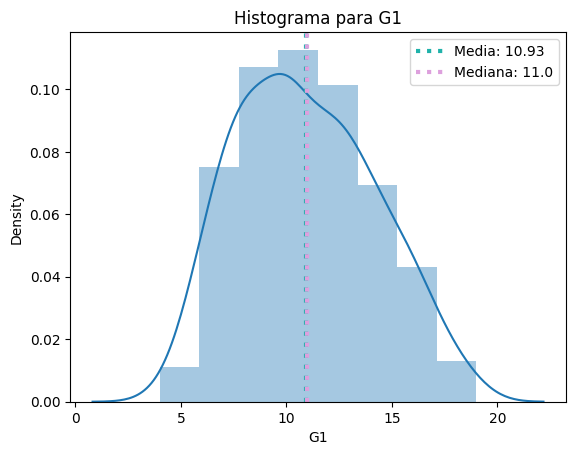

In [91]:
fp.plot_hist(df, "G1")

**Comentario:** En la variable G1, el minimo es 4 y el maximo 19, existe una concentracion entre 10 y casi los 12 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria. La media y mediana se encuentran relativamente cerca, pero no en el centro de la curva. No estoy seguro si visualmente podria llegar a tender a una curva normal.

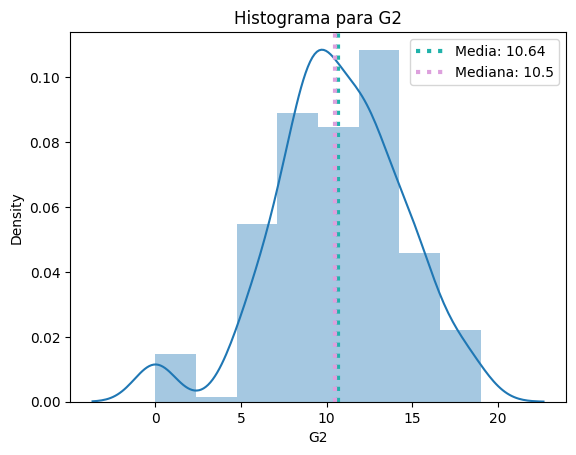

In [92]:
fp.plot_hist(df, "G2")

**Comentario:** En la variable G2, el minimo es 0 y el maximo 19, existe una concentracion entre 13 y los 14 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria, este aumento se puede deber porque en el segundo semestre aumentaron las notas buenas. La media y mediana se encuentran relativamente cerca, pero tambien estan cerca delde la curva. No tiende a una normal, porque existe una pequeña curva al comienzo.

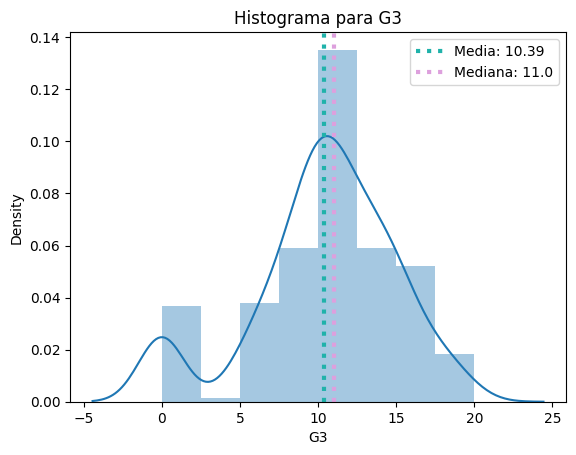

In [93]:
fp.plot_hist(df, "G3")

**Comentario:** En la variable G3, el minimo es 0 y el maximo 120, existe una concentracion entre 10 y los 12 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria, aumento la curtosis tambien. La media y mediana se encuentran relativamente cerca, pero tambien estan cerca delde la curva, siendo la media mas cercana. No tiende a una normal, porque existe una pequeña curva al comienzo.

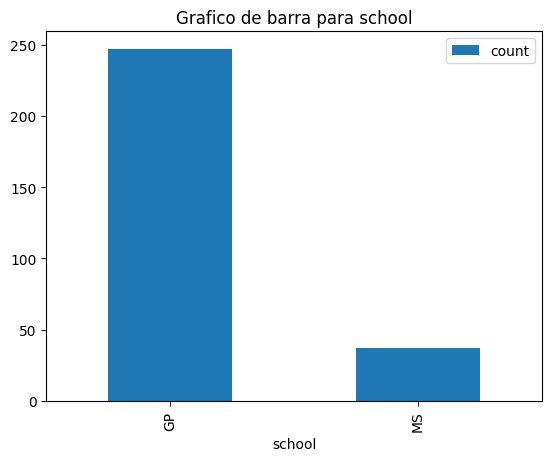

In [94]:
fp.plot_freq(df,"school")

**Comentario:** La variable GP es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tiene muy pocas observaciones MS

In [95]:
df["school"] = np.where(df["school"] == "MS", 1, 0)

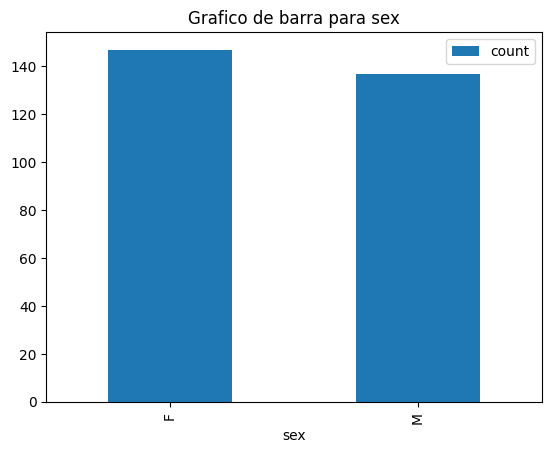

In [96]:
fp.plot_freq(df, "sex")

**Comentario:** La variable F es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tienen observaciones parecidas F y M

In [97]:
df["sex"] = np.where(df["sex"] == "M", 1, 0)

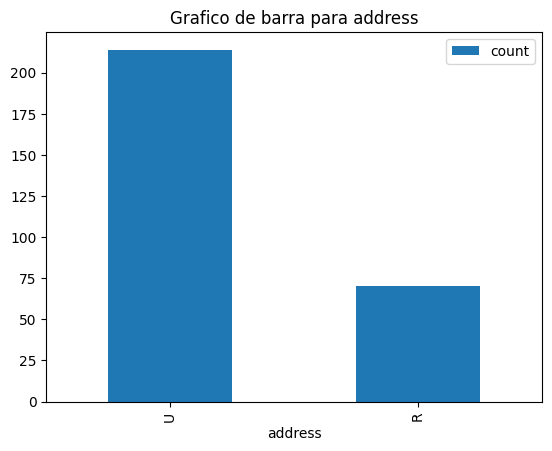

In [98]:
fp.plot_freq(df, "address")

**Comentario:** La variable U es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria viven en zonas urbanas, asi que puede ser un colegio urbano, por eso hay menos rurales

In [99]:
df["address"] = np.where(df["address"] == "R", 1, 0)

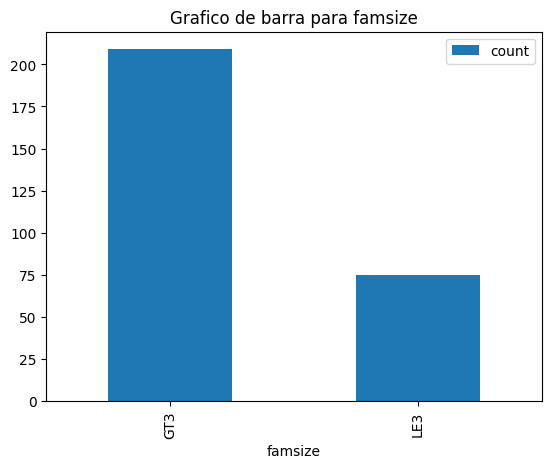

In [100]:
fp.plot_freq(df, "famsize")

**Comentario:** La variable GT3 es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria viven en tiene familia de mayores a 3

In [101]:
df["famsize"] = np.where(df["famsize"] == "LE3", 1, 0)

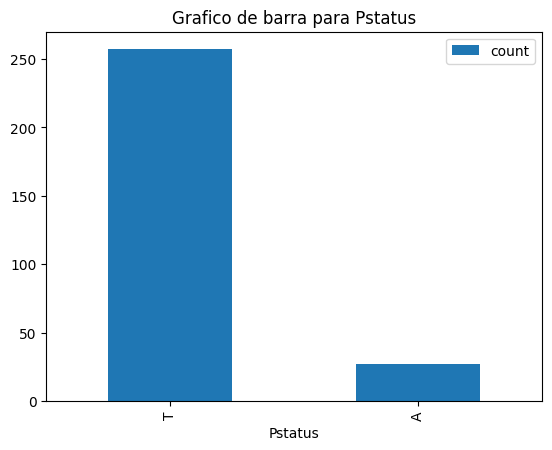

In [102]:
fp.plot_freq(df, "Pstatus")

**Comentario:** La variable T es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria tiene padres viviendo juntos, muy pocos tienen padres separados

In [103]:
df["Pstatus"] = np.where(df["Pstatus"] == "A", 1, 0)

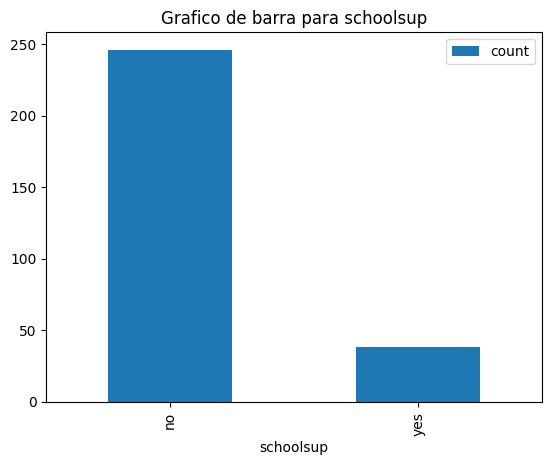

In [104]:
fp.plot_freq(df, "schoolsup")       

**Comentario:** La variable no es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Muy pocos tienen apoyo educacional del colegio

In [105]:
df["schoolsup"] = np.where(df["schoolsup"] == "yes", 1, 0)

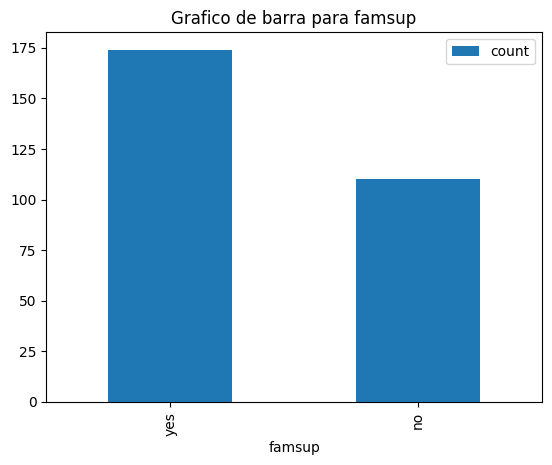

In [106]:
fp.plot_freq(df, "famsup")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria tiene apoyo educacional de su familia, aunque la cifra de los que no, igual es importante

In [107]:
df["famsup"] = np.where(df["famsup"] == "no", 1, 0)

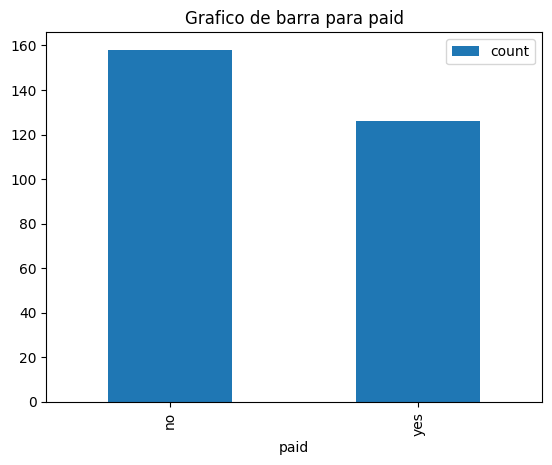

In [108]:
fp.plot_freq(df, "paid")

**Comentario:** La variable no es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria no tiene clases particulas pagadas, pero existe una cifra considerable que si las tiene

In [109]:
df["paid"] = np.where(df["paid"] == "yes", 1, 0)

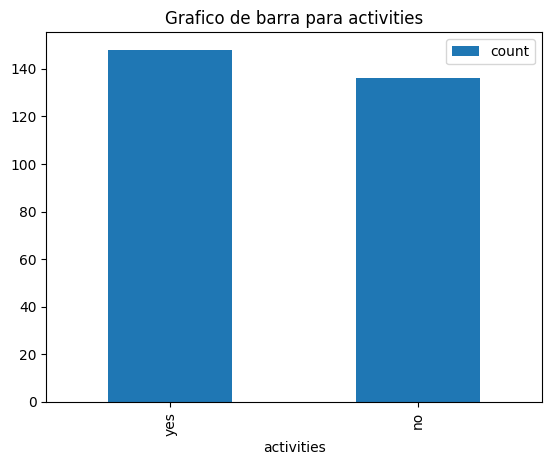

In [110]:
fp.plot_freq(df, "activities")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Se encuentra casi parecidas ambas opciones

In [111]:
df["activities"] = np.where(df["activities"] == "no", 1, 0)

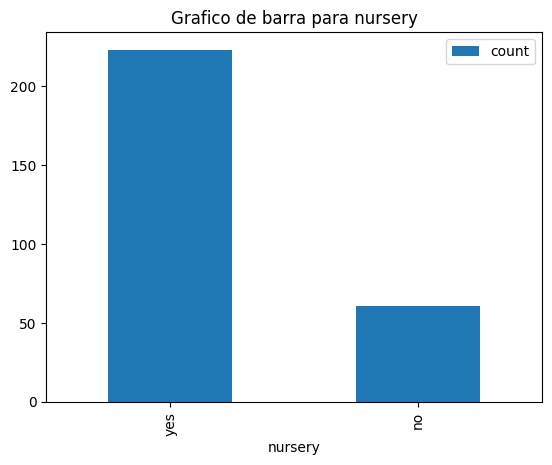

In [112]:
fp.plot_freq(df, "nursery")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria si fue a la guarderia

In [113]:
df["nursery"] = np.where(df["nursery"] == "no", 1, 0)

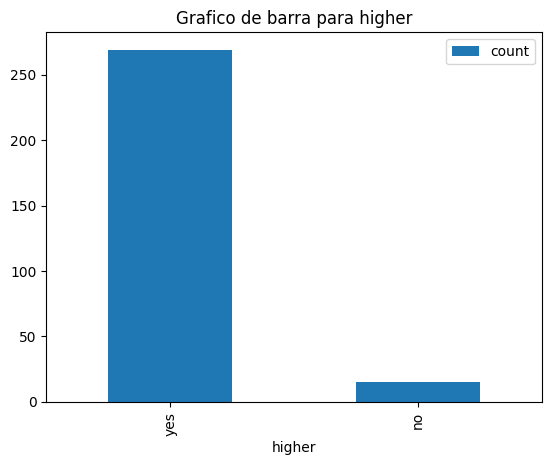

In [114]:
fp.plot_freq(df, "higher")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria si piensa seguir estudiando, muy pocos tienen pensado no seguir

In [115]:
df["higher"] = np.where(df["higher"] == "no", 1, 0)

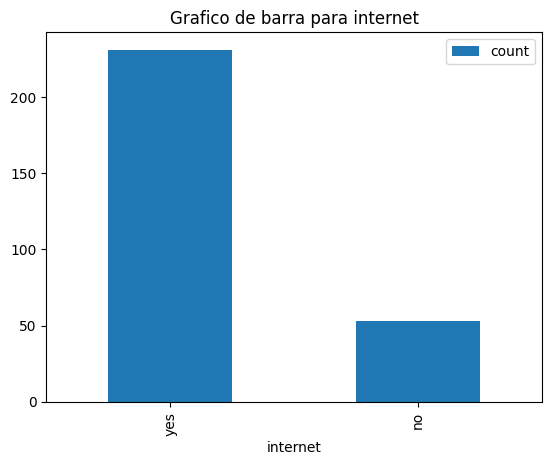

In [116]:
fp.plot_freq(df, "internet")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria si tiene internet, son parecidos los valores a los de zona urbana y rural, no se si tendra relacion.

In [117]:
df["internet"] = np.where(df["internet"] == "no", 1, 0)

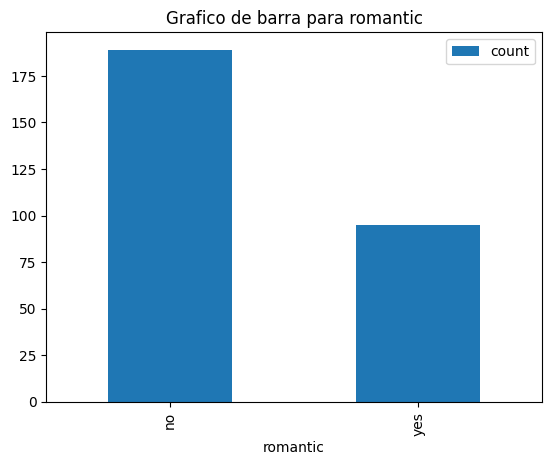

In [118]:
fp.plot_freq(df, "romantic")

**Comentario:** La variable no es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria no se en una relacion romantica

In [119]:
df["romantic"] = np.where(df["romantic"] == "yes", 1, 0)

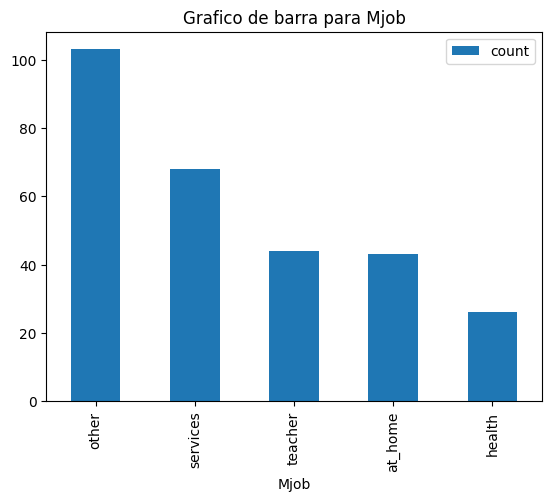

In [120]:
fp.plot_freq(df, "Mjob")

**Comentario:** La variable other es la de mayor frecuencia, al recodificar esta se dejara fuera. La mayoria de las mujeres tienen un trabajo que cae en la clasificacion other, y la menor pertencen al area de salud

In [121]:
df["Mteacher"] = np.where(df["Mjob"] == "teacher", 1, 0)
df["Mhealth"] = np.where(df["Mjob"] == "health", 1, 0)
df["Mservices"] = np.where(df["Mjob"] == "services", 1, 0)
df["Mat_home"] = np.where(df["Mjob"] == "at_home", 1, 0)

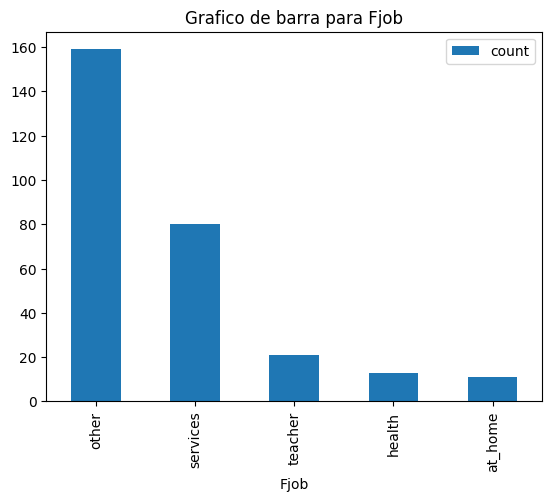

In [122]:
fp.plot_freq(df, "Fjob")

**Comentario:** La variable other es la de mayor frecuencia, al recodificar esta se dejara fuera. Al igual que las mujeresLa mayoria de los hombres tienen un trabajo que cae en la clasificacion other, y la menor pertencen al area de en casa

In [123]:
df["Fteacher"] = np.where(df["Fjob"] == "teacher", 1, 0)
df["Fhealth"] = np.where(df["Fjob"] == "health", 1, 0)
df["Fservices"] = np.where(df["Fjob"] == "services", 1, 0)
df["Fat_home"] = np.where(df["Fjob"] == "at_home", 1, 0)

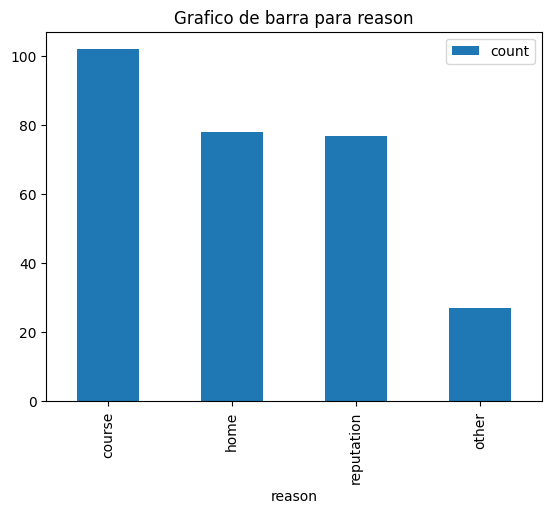

In [124]:
fp.plot_freq(df, "reason")

**Comentario:** La variable coursee es la de mayor frecuencia, al recodificar esta se dejara fuera. La mayoria escoge la escuela por el tipo de cursos que ofrece

In [125]:
df["R_home"] = np.where(df["reason"] == "home", 1, 0)
df["R_reputation"] = np.where(df["reason"] == "reputation", 1, 0)
df["R_other"] = np.where(df["reason"] == "other", 1, 0)

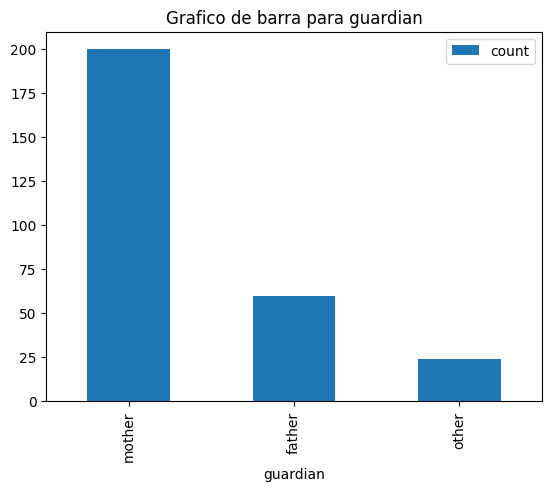

In [126]:
fp.plot_freq(df, "guardian")

**Comentario:** La variable mother es la de mayor frecuencia, al recodificar esta se dejara fuera. La mayoria de las madres son los apoderados de los alumnos

In [127]:
df["G_father"] = np.where(df["guardian"] == "father", 1, 0)
df["G_other"] = np.where(df["guardian"] == "other", 1, 0)

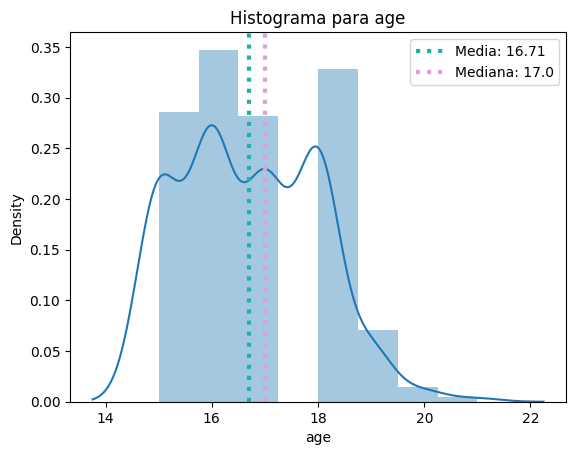

In [128]:
fp.plot_hist(df, "age")

**Comentario:** En la variable age, el minimo es 15 y el maximo 21, existe una concentracion entre 17 y 18 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria. Puede corresponder a alumnos de secundaria o enseñanza media

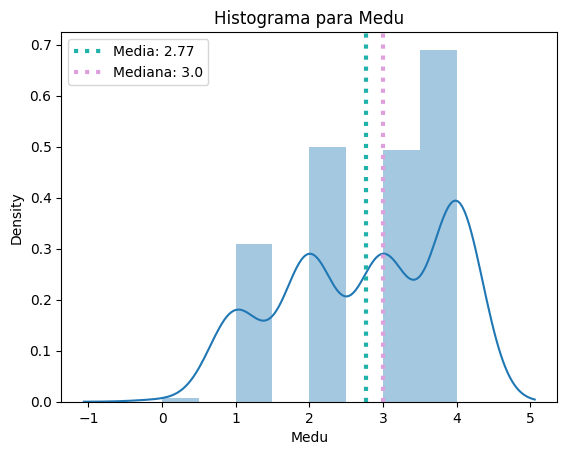

In [129]:
fp.plot_hist(df, "Medu")

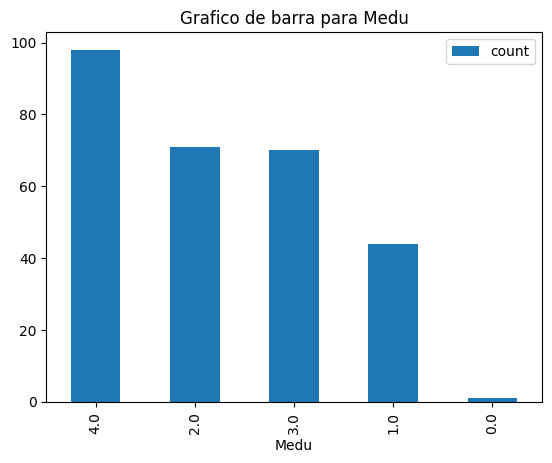

In [130]:
fp.plot_freq(df, "Medu")

**Comentario:** En la variable Medu, el minimo es 0 y el maximo 4, existe una concentracion a nivel del 4.

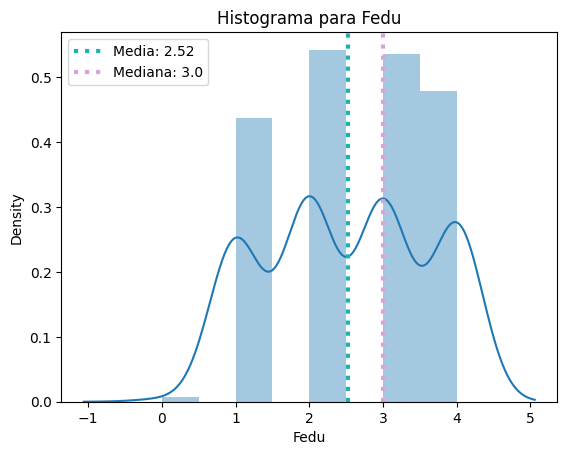

In [131]:
fp.plot_hist(df, "Fedu")

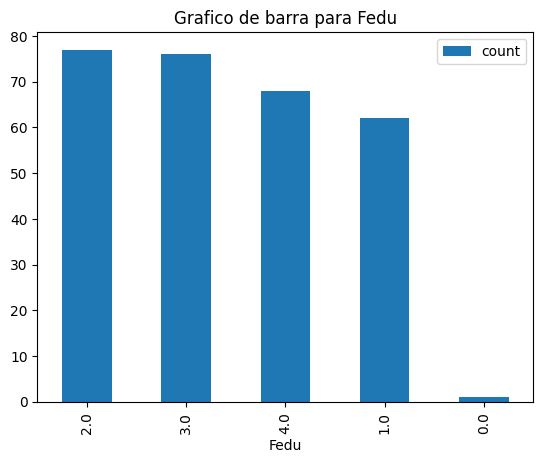

In [132]:
fp.plot_freq(df, "Fedu")

**Comentario:** En la variable Fedu, el minimo es 0 y el maximo 4, existe una concentracion entre 2 y 3, tiene un media mas baja que Medu

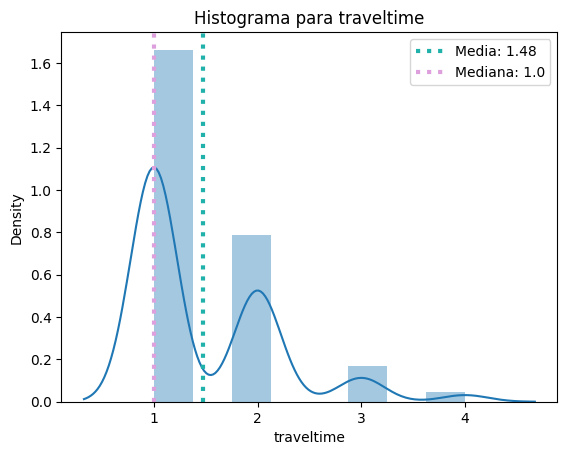

In [133]:
fp.plot_hist(df, "traveltime")

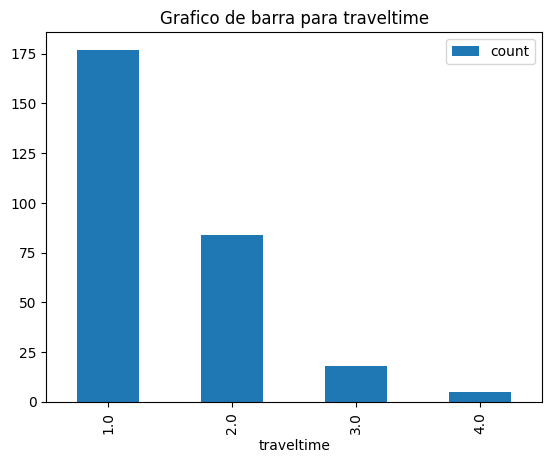

In [134]:
fp.plot_freq(df, "traveltime")

**Comentario:** En la variable traveltime, el minimo es 1 y el maximo 4, existe una concentracion en el nivel 1, la mayoria vive mas cerca del colegio.

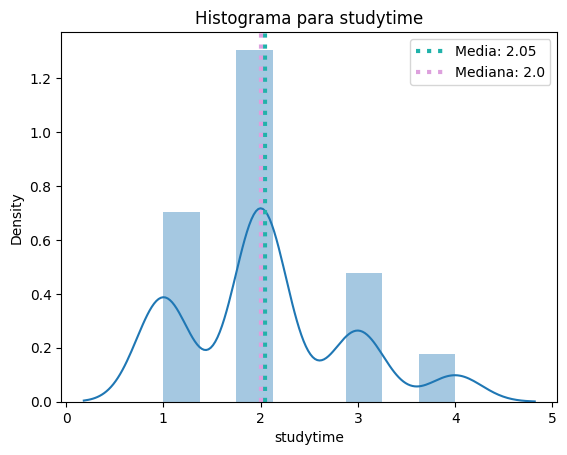

In [135]:
fp.plot_hist(df, "studytime")

**Comentario:** En la variable traveltime, el minimo es 1 y el maximo 4, existe una concentracion en el nivel 2, la mayoria estudia entre 2 y 5 horas.

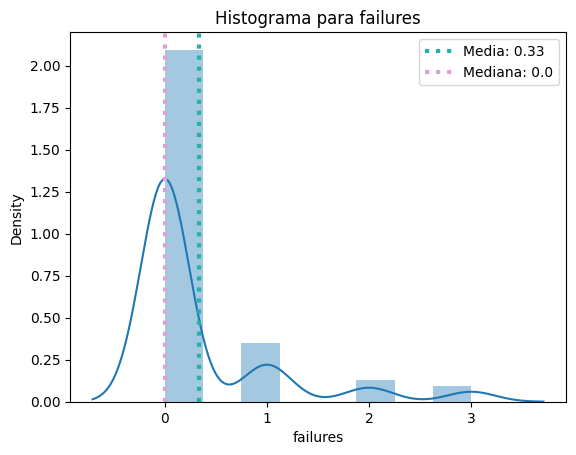

In [136]:
fp.plot_hist(df, "failures")

**Comentario:** En la variable failures, el minimo es 0 y el maximo 3, existe una concentracion en el nivel 0, la mayoria no tiene clases reprobadas

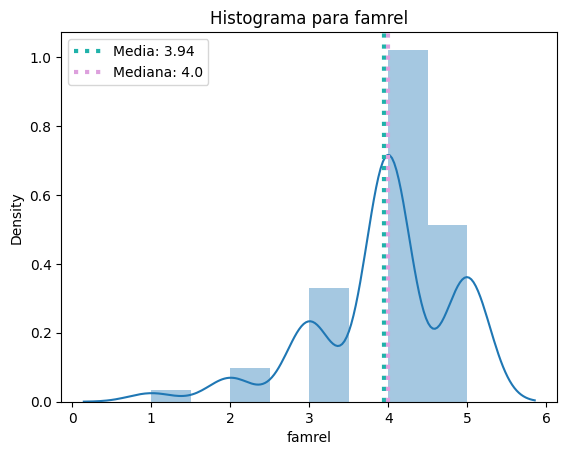

In [137]:
fp.plot_hist(df, "famrel")

**Comentario:** En la variable famrel, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 4, la mayoria tiene buenas relaciones familiares

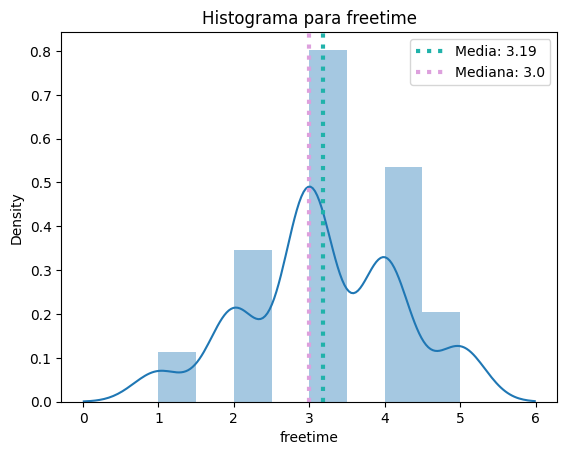

In [138]:
fp.plot_hist(df, "freetime")

**Comentario:** En la variable freetime, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 3.

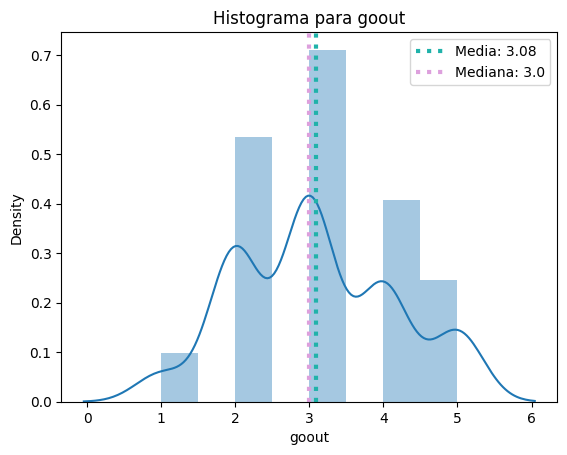

In [139]:
fp.plot_hist(df, "goout")

**Comentario:** En la variable traveltime, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 3, un nivel intermedio de salidas con amigos

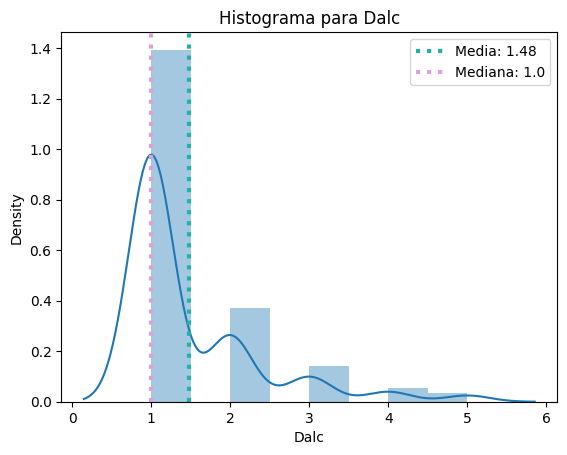

In [140]:
fp.plot_hist(df, "Dalc")

**Comentario:** En la variable Dalc, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 1, la mayoria tiene un bajo consumo de alcohol en la semana

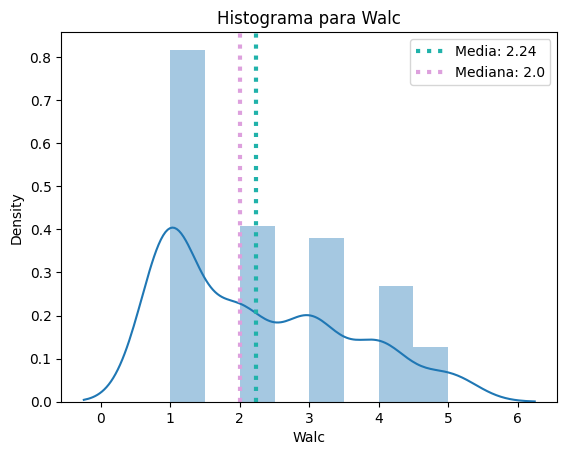

In [141]:
fp.plot_hist(df, "Walc")

**Comentario:** En la variable Walc, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 1, la mayoria tiene un bajo consumo de alcohol en los fin de semana semana, pero existe un aumento en comparacion a los dias de semana

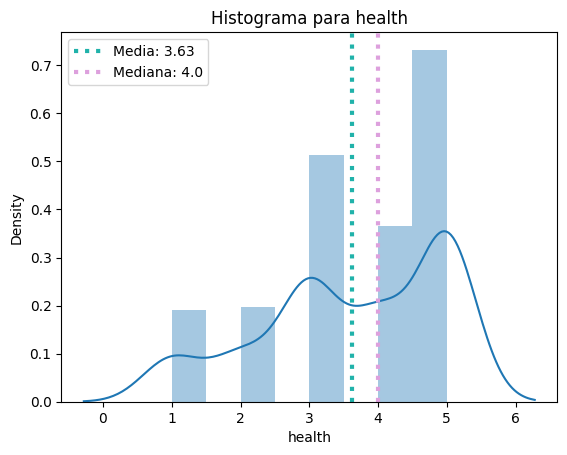

In [142]:
fp.plot_hist(df, "health")

**Comentario:** En la variable Dalc, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 2, la mayoria tiene un buen estado de salud

In [143]:
df["absences"].describe()

count    284.000000
mean       5.588028
std        8.156335
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       75.000000
Name: absences, dtype: float64

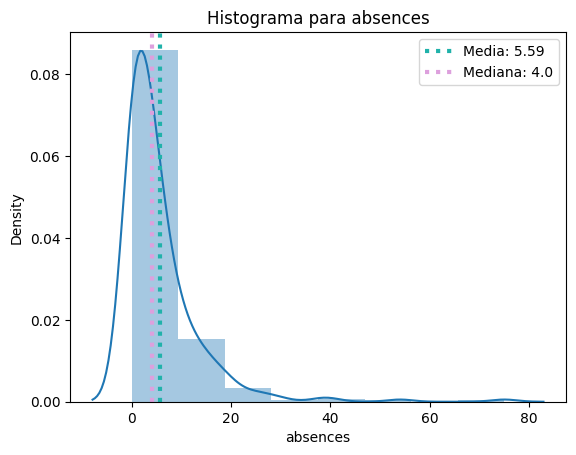

In [144]:
fp.plot_hist(df, "absences")

**Comentario:** En la variable Dalc, el minimo es 0 y el maximo 75, la mayoria tiene pocas ausencias escolares

*Analisis de variable vector vs las demas variables* (solo dejare las que me llaman la atencion)

<Axes: xlabel='age', ylabel='G3'>

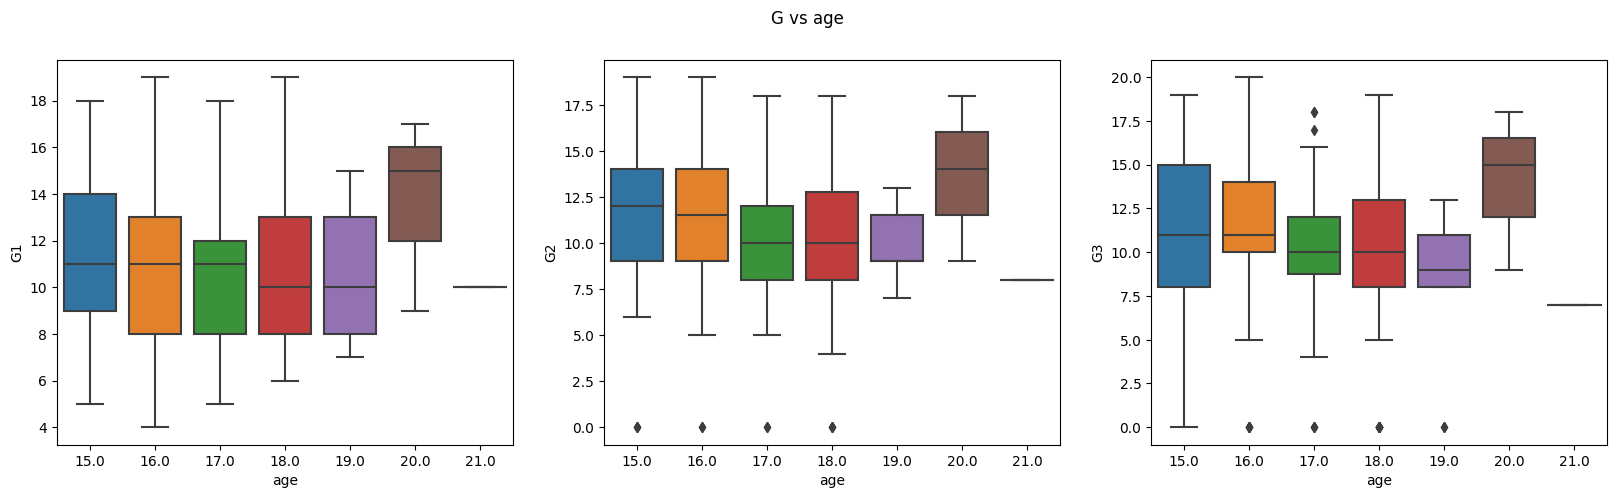

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs age')

sns.boxplot(ax=axes[0], data=df, x="age", y="G1")
sns.boxplot(ax=axes[1], data=df, x="age", y="G2")
sns.boxplot(ax=axes[2], data=df, x="age", y="G3")

**Comentario:** Existe un aumento en G2, porque varios tuvieron que cumplir años el segundo semestre

<Axes: xlabel='Mjob', ylabel='G3'>

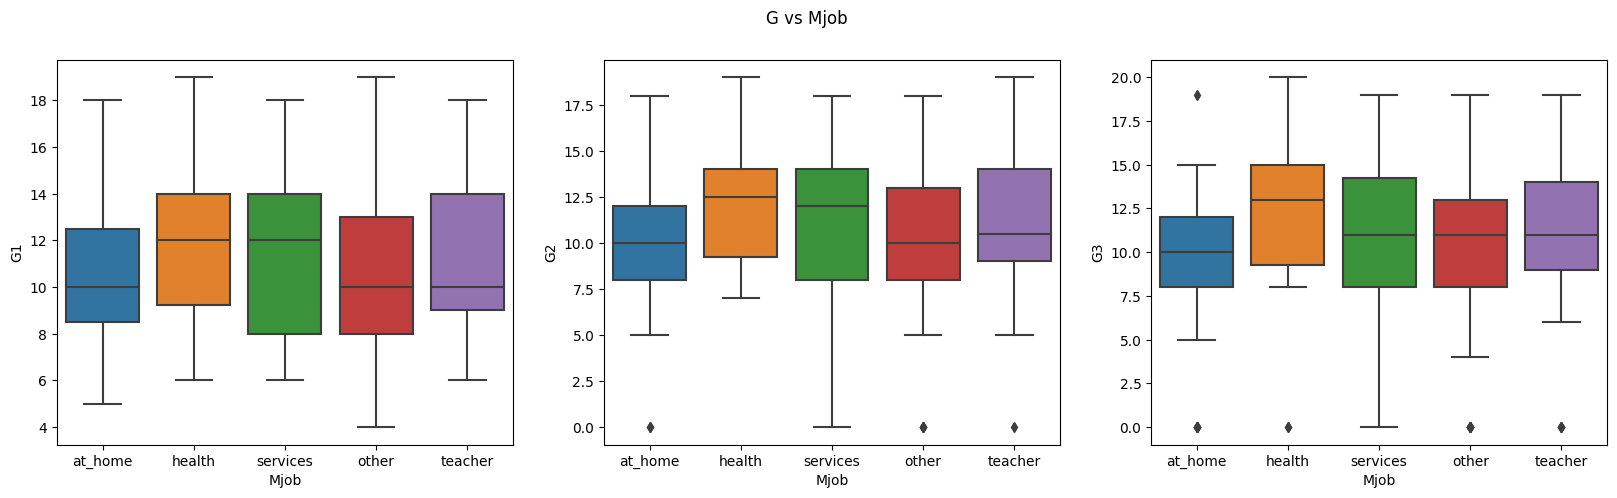

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Mjob')

sns.boxplot(ax=axes[0], data=df, x="Mjob", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Mjob", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Mjob", y="G3")

**Comentario:** Los alumnos que tienen madres que se dedican al area de salud, tiene una mediana mayor en notas

<Axes: xlabel='Fedu', ylabel='G3'>

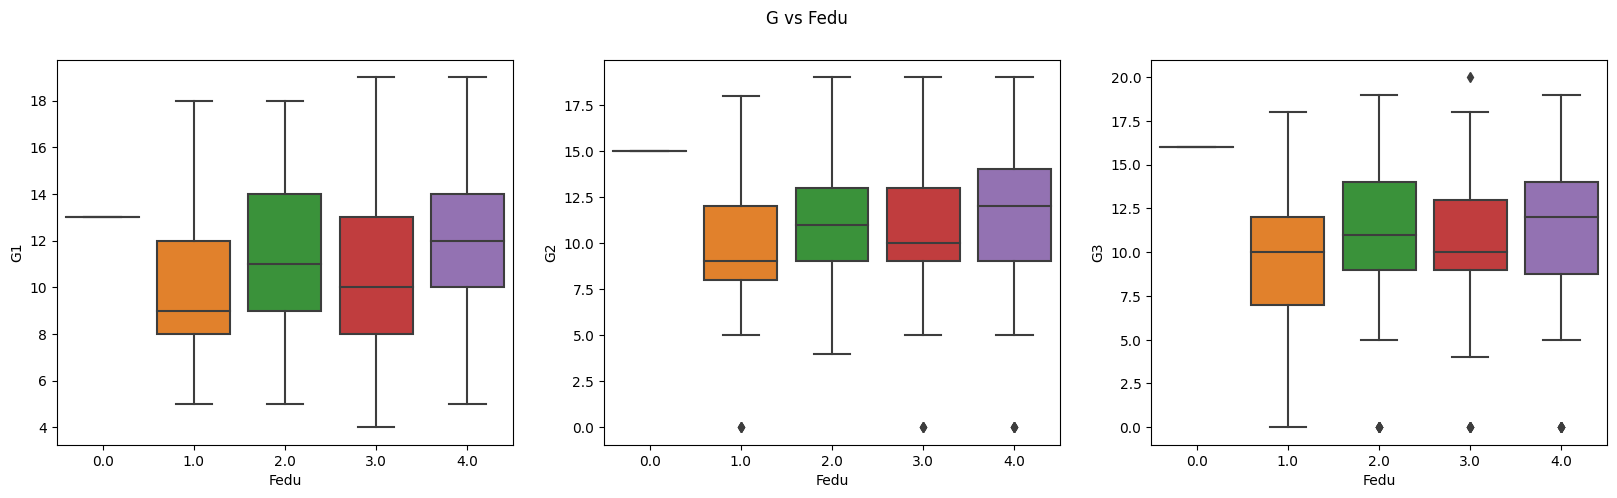

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Fedu')

sns.boxplot(ax=axes[0], data=df, x="Fedu", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Fedu", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Fedu", y="G3")

**Comentario:** Los alumnos que tienen padres con mayor nivel educacional, tiene una mediana mayor en notas

<Axes: xlabel='Medu', ylabel='G3'>

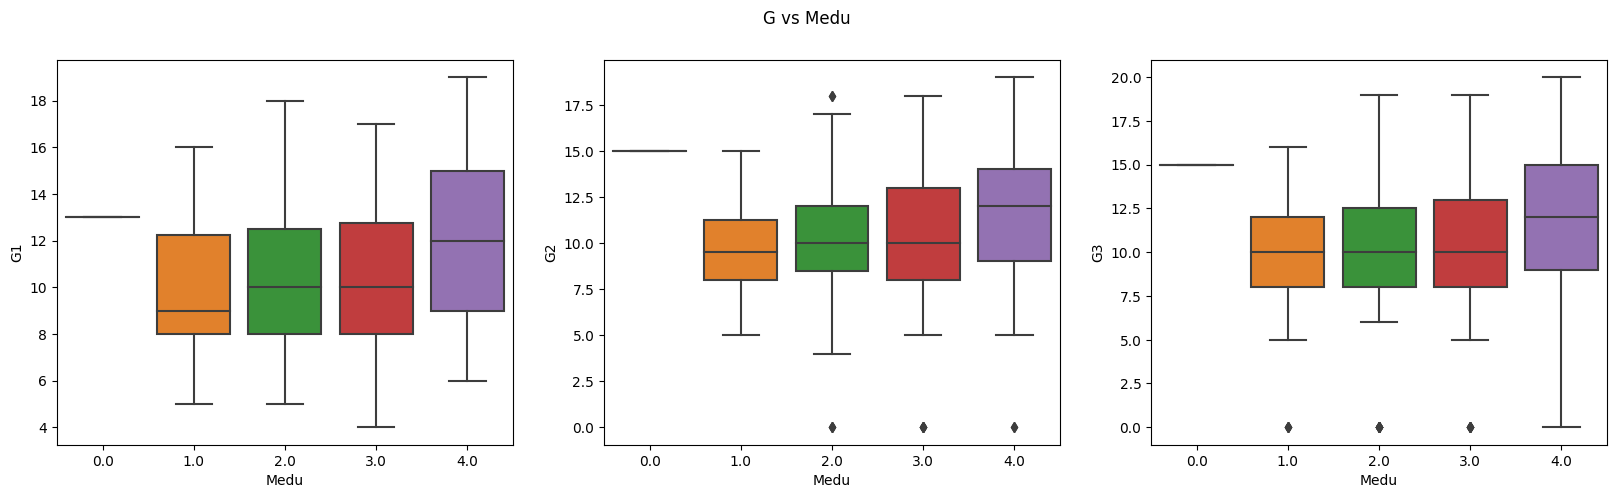

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Medu')

sns.boxplot(ax=axes[0], data=df, x="Medu", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Medu", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Medu", y="G3")

**Comentario:** Los alumnos que tienen madres con mayor nivel educacional, tiene una mediana mayor en notas, igual que en el caso de los padres

<Axes: xlabel='Fjob', ylabel='G3'>

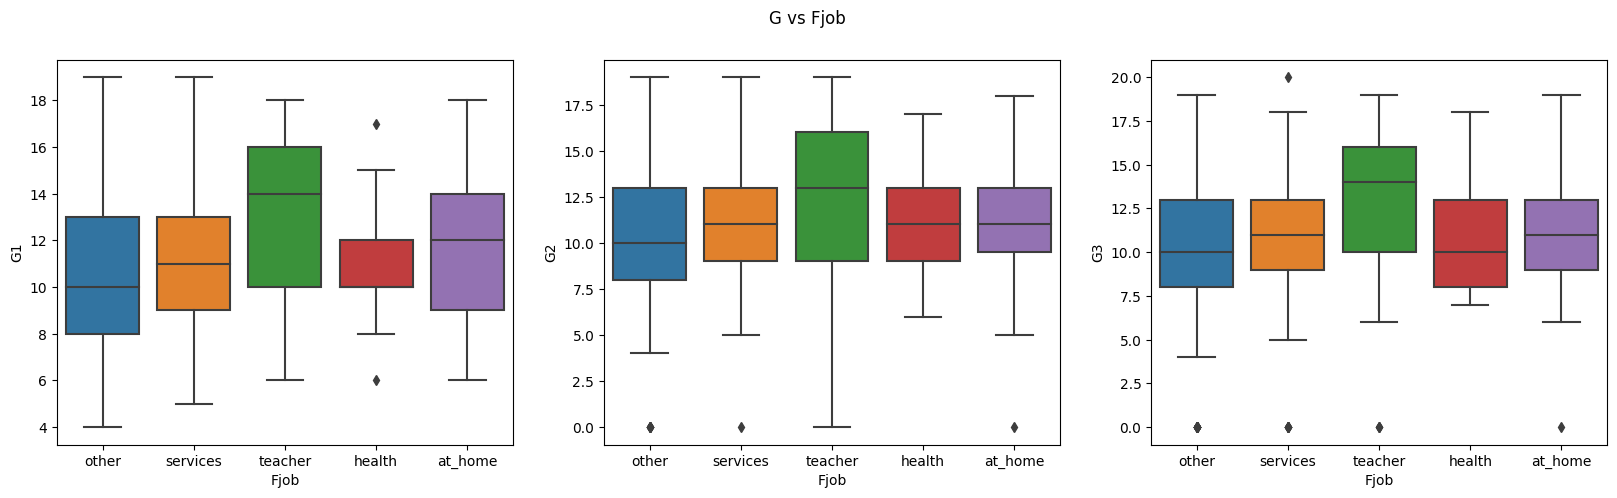

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Fjob')

sns.boxplot(ax=axes[0], data=df, x="Fjob", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Fjob", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Fjob", y="G3")

**Comentario:** Los alumnos que tienen padres con tienen trabajo como profesor, tiene una mediana mayor en notas.

<Axes: xlabel='guardian', ylabel='G3'>

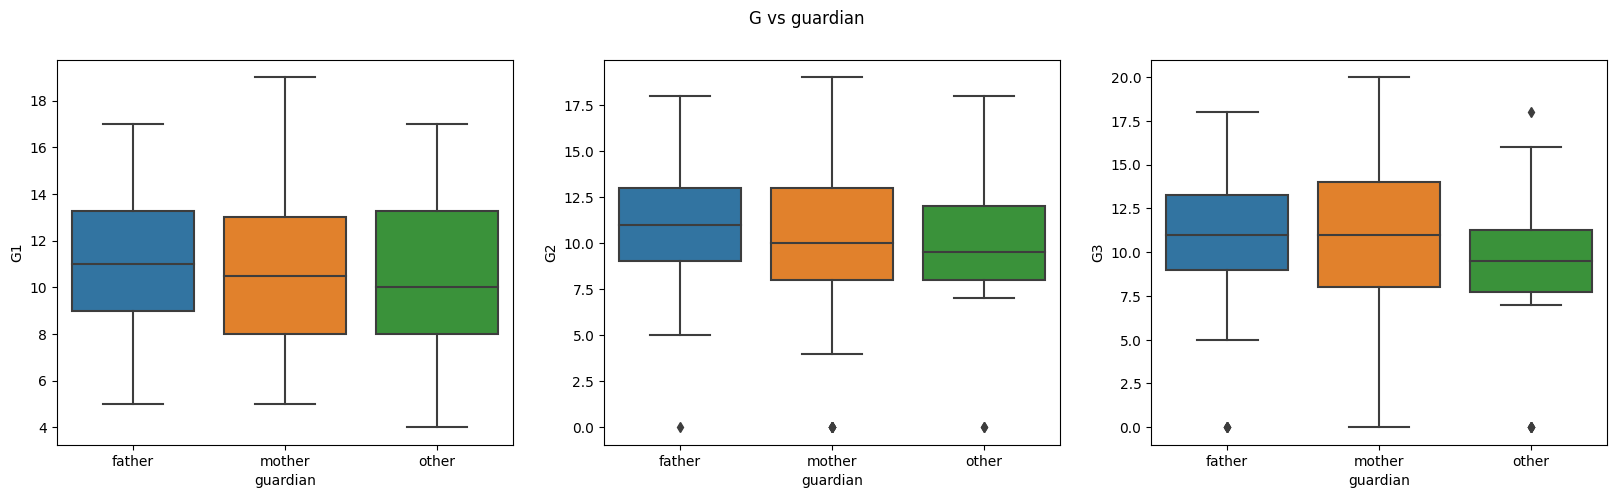

In [150]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs guardian')

sns.boxplot(ax=axes[0], data=df, x="guardian", y="G1")
sns.boxplot(ax=axes[1], data=df, x="guardian", y="G2")
sns.boxplot(ax=axes[2], data=df, x="guardian", y="G3")

**Comentario:** Los alumnos en G3 tienen notas parecidas si tienen de apoderado al papa o la mama, pero si es baja en otros.

<Axes: xlabel='traveltime', ylabel='G3'>

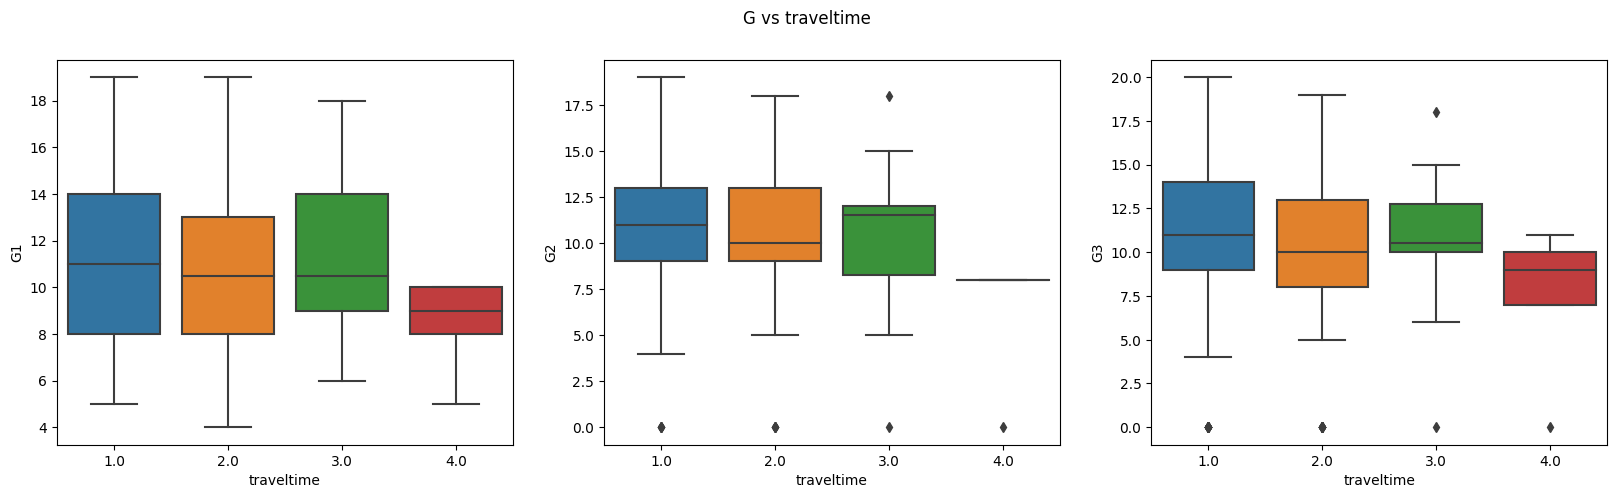

In [151]:
"""○ 1 si es menos de 15 min, ○ 2 si es de 15 a 30 min, ○ 3 si es de 30 min. a 1 hora, ○ 4 - si es más de 1 hora)."""

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs traveltime')

sns.boxplot(ax=axes[0], data=df, x="traveltime", y="G1")
sns.boxplot(ax=axes[1], data=df, x="traveltime", y="G2")
sns.boxplot(ax=axes[2], data=df, x="traveltime", y="G3")

**Comentario:** Hubo un cambio entre los semestres, pensaria que siempre hubiera sido igual

<Axes: xlabel='studytime', ylabel='G3'>

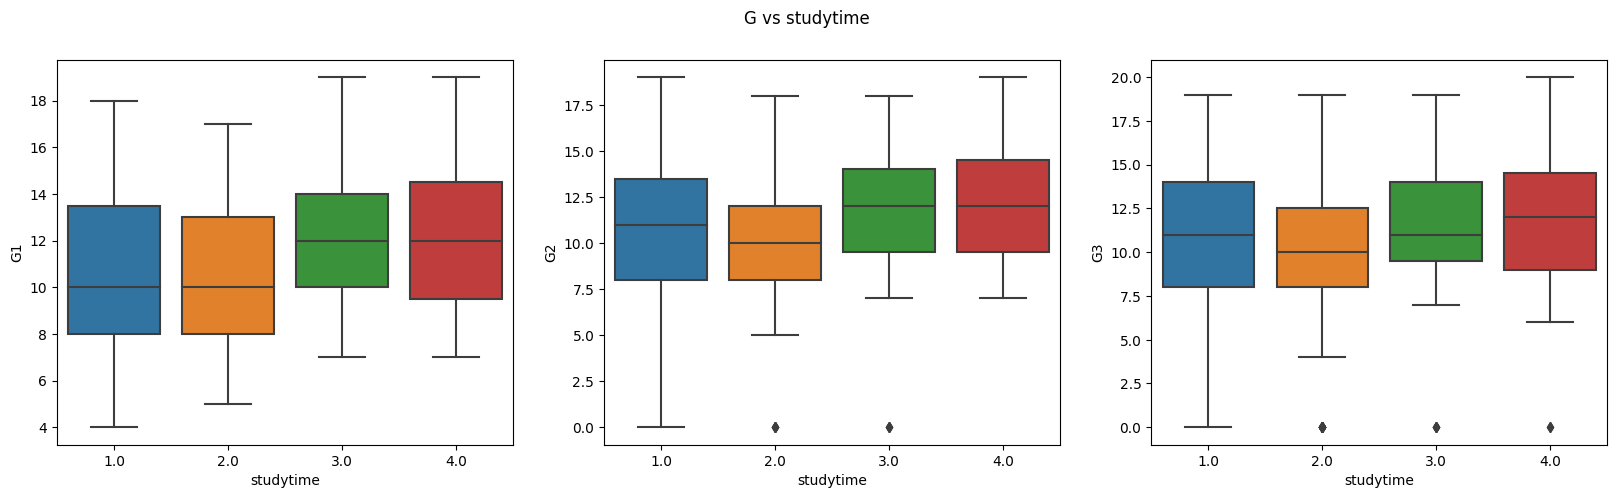

In [152]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs studytime')

sns.boxplot(ax=axes[0], data=df, x="studytime", y="G1")
sns.boxplot(ax=axes[1], data=df, x="studytime", y="G2")
sns.boxplot(ax=axes[2], data=df, x="studytime", y="G3")

**Comentario:** Hubo un cambio entre los semestres, subieron las notas en G2 y tambien bajo la dispersion de los datos

<Axes: xlabel='failures', ylabel='G3'>

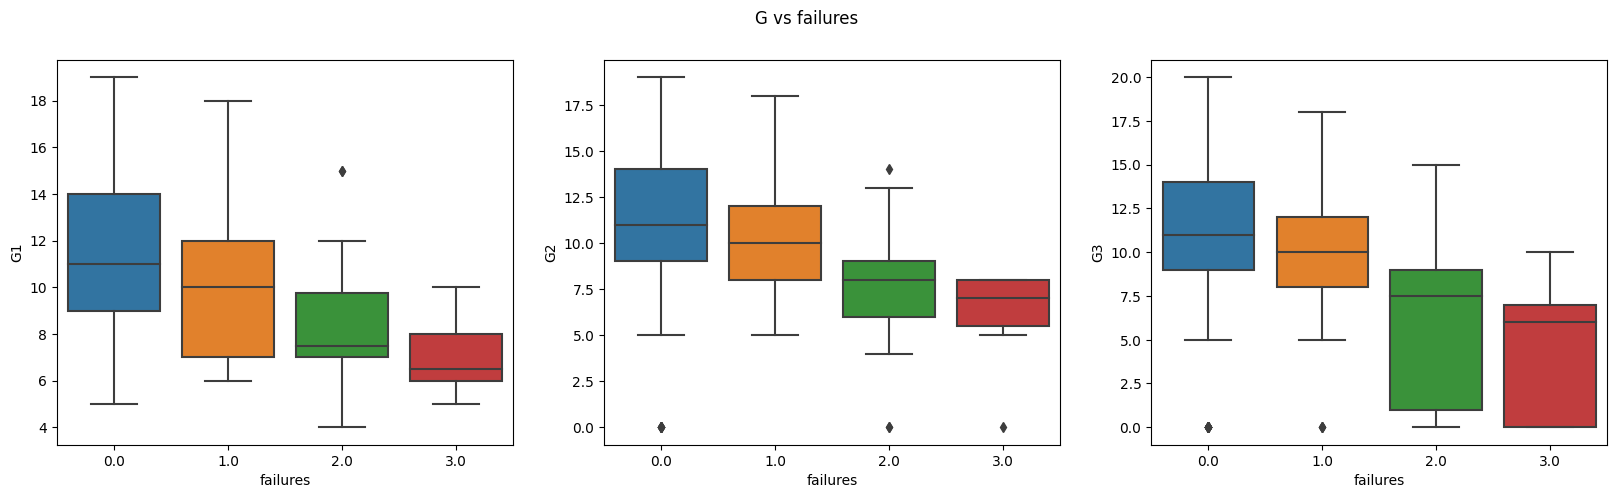

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs failures')

sns.boxplot(ax=axes[0], data=df, x="failures", y="G1")
sns.boxplot(ax=axes[1], data=df, x="failures", y="G2")
sns.boxplot(ax=axes[2], data=df, x="failures", y="G3")

**Comentario:** Hubo un cambio entre los semestres, subieron las notas en G2 y tambien bajo la dispersion de los datos

<Axes: xlabel='higher', ylabel='G3'>

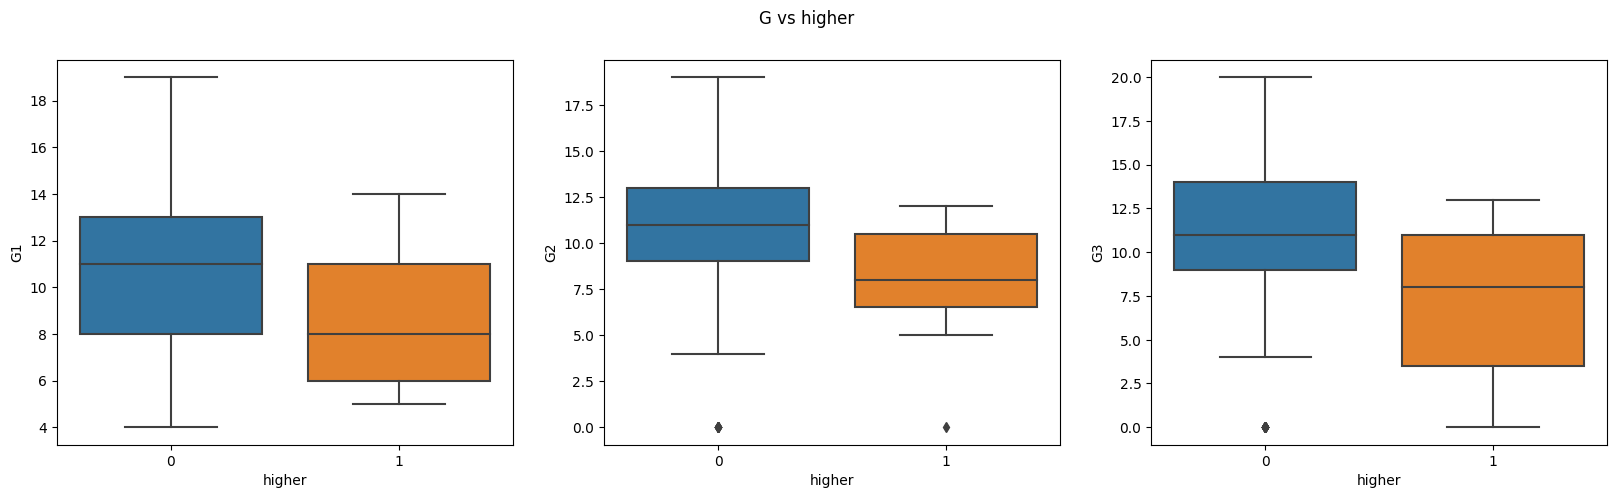

In [154]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs higher')

sns.boxplot(ax=axes[0], data=df, x="higher", y="G1")
sns.boxplot(ax=axes[1], data=df, x="higher", y="G2")
sns.boxplot(ax=axes[2], data=df, x="higher", y="G3")

**Comentario:** Aca se nota que tienen mejores notas los que piensan seguir estudiando

<Axes: xlabel='goout', ylabel='G3'>

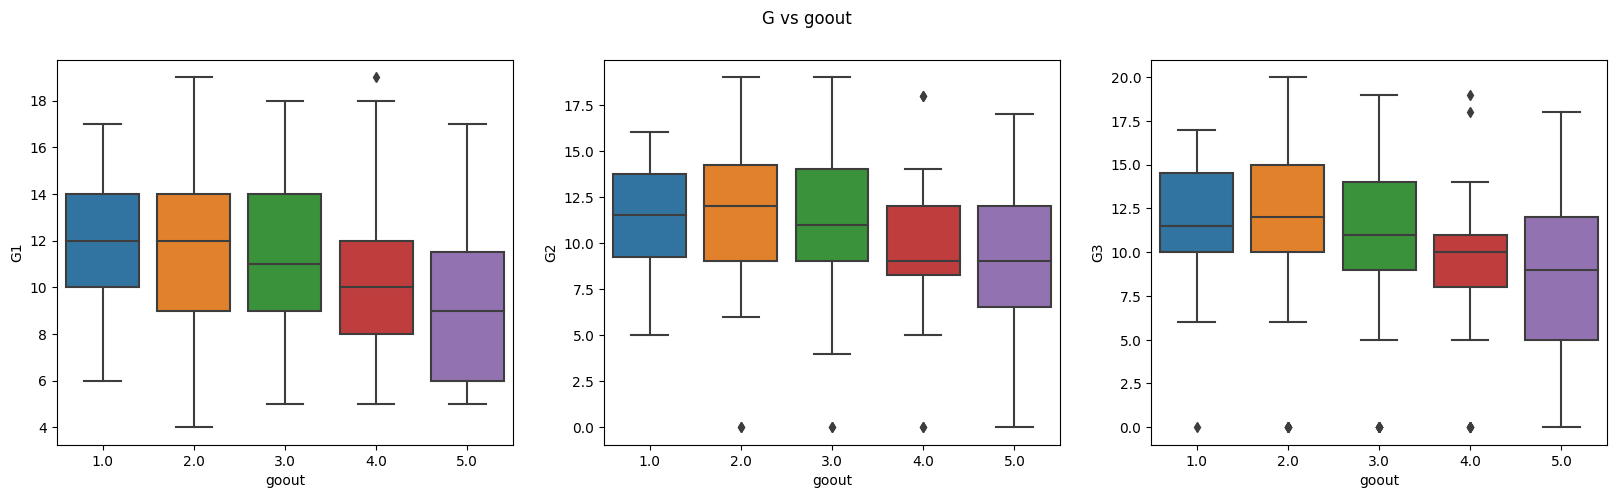

In [155]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs goout')

sns.boxplot(ax=axes[0], data=df, x="goout", y="G1")
sns.boxplot(ax=axes[1], data=df, x="goout", y="G2")
sns.boxplot(ax=axes[2], data=df, x="goout", y="G3")

**Comentario:** Los que tienen mas salidas con amigos tienen una mediana mas baja

<Axes: xlabel='Dalc', ylabel='G3'>

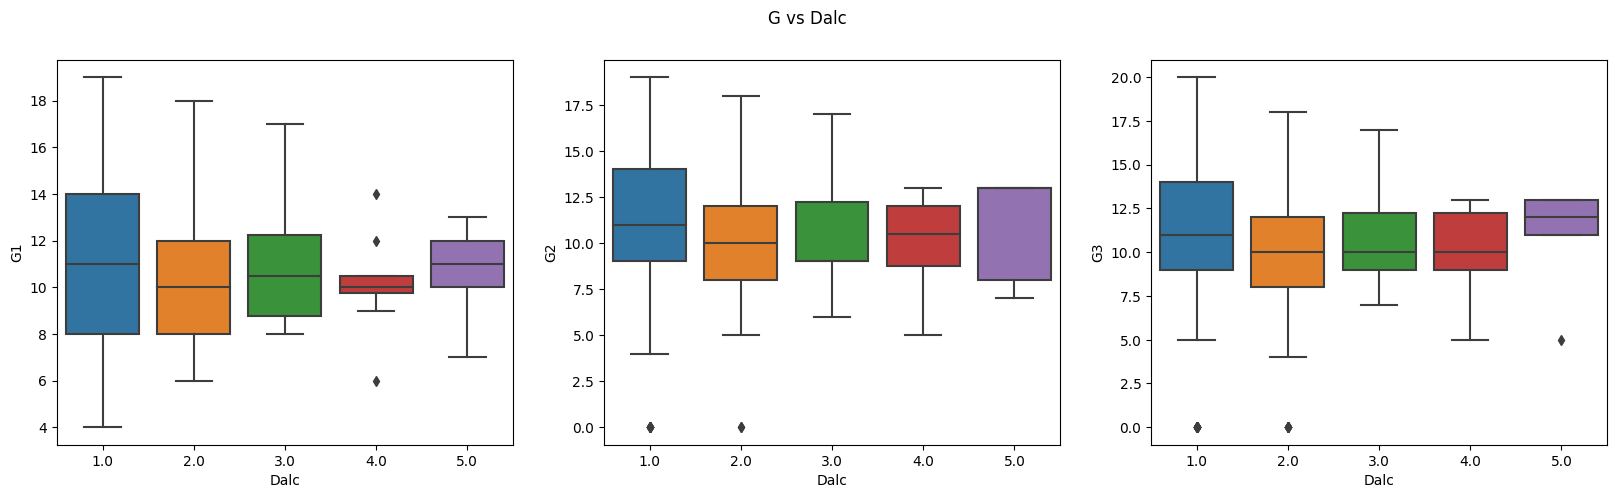

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Dalc')

sns.boxplot(ax=axes[0], data=df, x="Dalc", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Dalc", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Dalc", y="G3")

**Comentario:** Los que tienen mas salidas con amigos tienen una mediana mas baja

<Axes: xlabel='Walc', ylabel='G3'>

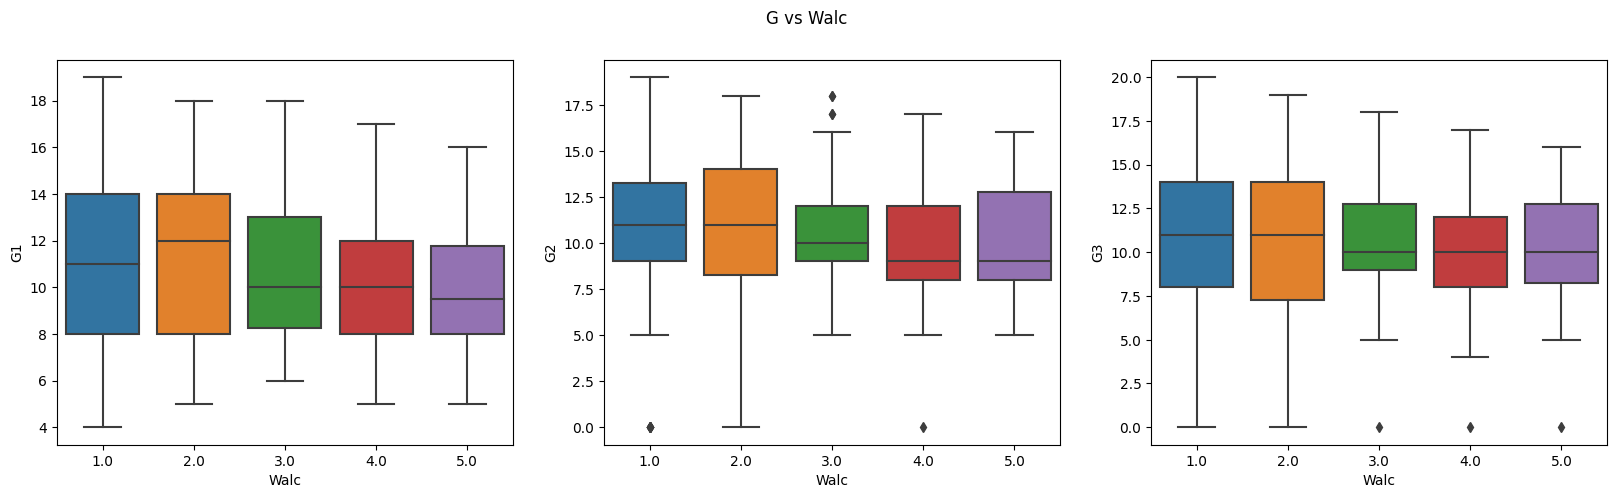

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Walc')

sns.boxplot(ax=axes[0], data=df, x="Walc", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Walc", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Walc", y="G3")

**Comentario:** Los que tienen mas salidas con amigos tienen una mediana mas baja

<Axes: xlabel='health', ylabel='G3'>

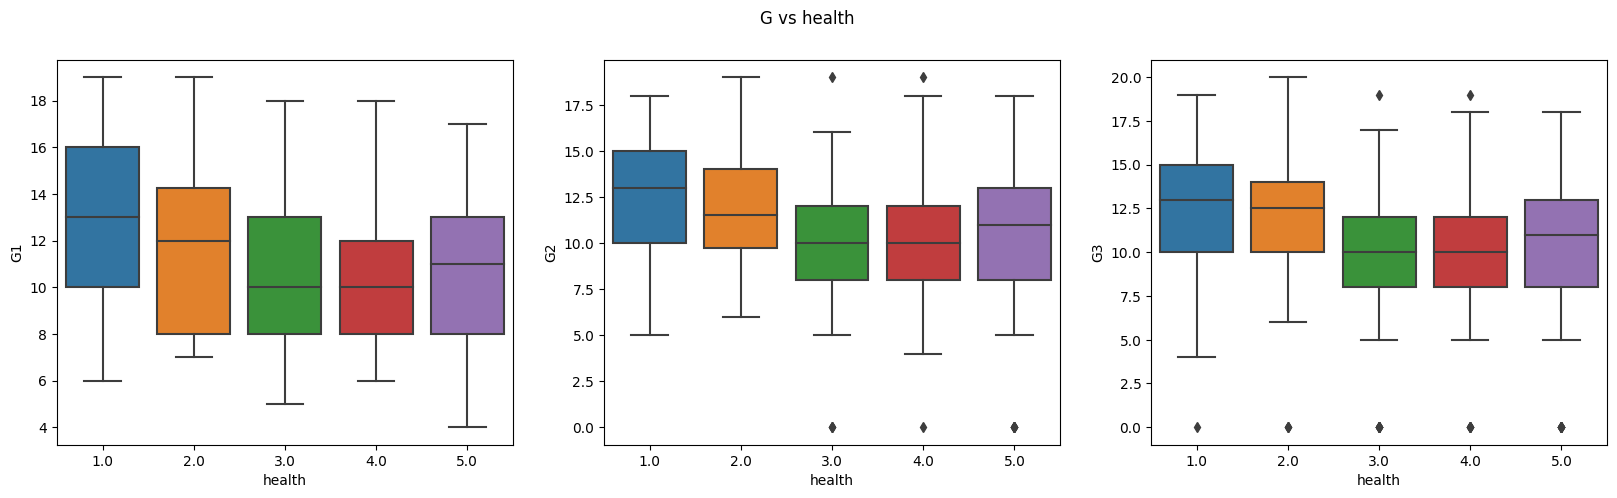

In [158]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs health')

sns.boxplot(ax=axes[0], data=df, x="health", y="G1")
sns.boxplot(ax=axes[1], data=df, x="health", y="G2")
sns.boxplot(ax=axes[2], data=df, x="health", y="G3")

**Comentario:** Los que tienen mal estado estado de salud tienen mejores notas, aunque supongo que no siempre son los mismos

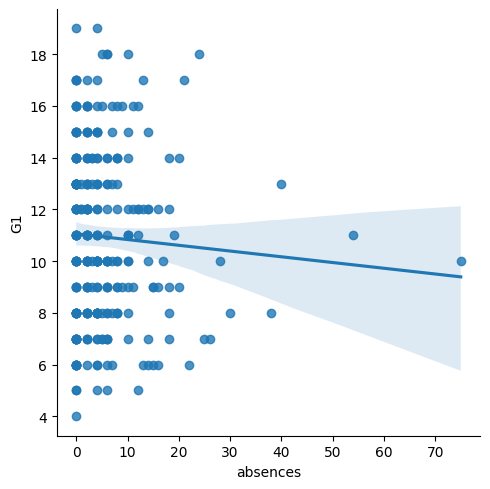

In [159]:
sns.lmplot(x="absences", y="G1", data=df)

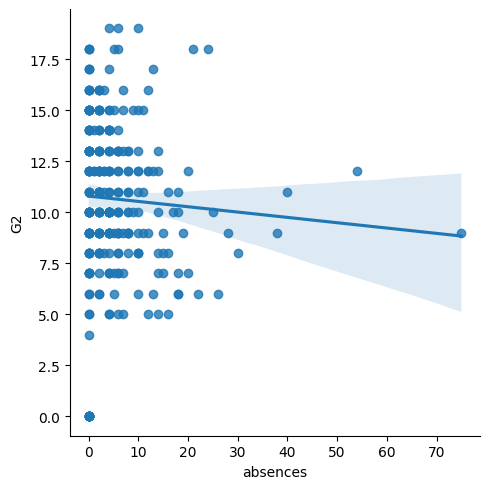

In [160]:
sns.lmplot( data=df, x="absences", y="G2")


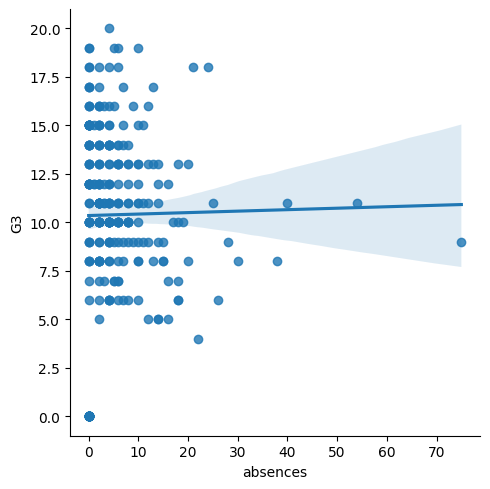

In [161]:
sns.lmplot( data=df, x="absences", y="G3")

**Comentario:** Al parecer se mantienen constate al tener aumento de asistencias, pero se nota que hay una acumulacion en las ausencias bajas

- Las variables que no estan graficas, eran porque tenian una mediana o distribucion parecida, como es solo inspeccion visual es dficil ver si son diferencias estadisticamente significativas sin hacer docimas de hipotesis

## Hito 3

In [162]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Mteacher', 'Mhealth',
       'Mservices', 'Mat_home', 'Fteacher', 'Fhealth', 'Fservices', 'Fat_home',
       'R_home', 'R_reputation', 'R_other', 'G_father', 'G_other'],
      dtype='object')

In [163]:
modelo_G1 = smf.ols("G1 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + +higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mteacher + Mhealth + Mservices + Mat_home + Fteacher + Fhealth + Fservices + Fat_home + R_home + R_reputation + R_other + G_father + G_other", data=df).fit()


In [164]:
modelo_G1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.224    
Dependent Variable: G1               AIC:                1447.2509
Date:               2023-04-22 17:26 BIC:                1593.2099
No. Observations:   284              Log-Likelihood:     -683.63  
Df Model:           39               F-statistic:        3.090    
Df Residuals:       244              Prob (F-statistic): 5.75e-08 
R-squared:          0.331            Scale:              8.3997   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       7.8430    3.4068   2.3022  0.0222   1.1326  14.5534
school         -0.3886    0.6664  -0.5832  0.5603  -1.7013   0.9241
sex             0.7631    0.4316   1.7680  0.0783  -0.0871   1.6134
age             0.0772    0.1848   0.4177  0.6765  -0.2869   0.4413
address        -0.0205    0.4869  -0.0422  0.9664  -0.9797   0.9386
famsize         0.3125    0.4402   0.7099  0.4784  -0.5546   1.1795
Pstatus         0.1872    0.6504   0.2879  0.7737  -1.0938   1.4683
Medu            0.1809    0.2817   0.6421  0.5214  -0.3740   0.7357
Fedu            0.1527    0.2362   0.6463  0.5187  -0.3126   0.6179
traveltime     -0.0215    0.2908  -0.0738  0.9412  -0.5943   0.5514
studytime       0.5074    0.2454   2.0678  0.0397   0.0241   0.9907
failures       -1.1235    0.2825  -3.9771  0.0001  -1.6799  -0.5671
schoolsup      -1.7737    0.5639  -3.1453  0.0019  -2.8845  -0.6629
famsup          1.0062    0.4112   2.4468  0.0151   0.1962   1.8161
paid            0.0321    0.4030   0.0797  0.9365  -0.7617   0.8260
activities      0.4719    0.3700   1.2755  0.2033  -0.2569   1.2007
nursery         0.0255    0.4551   0.0560  0.9554  -0.8709   0.9218
higher         -1.1077    0.8758  -1.2648  0.2072  -2.8327   0.6174
internet       -0.0671    0.5016  -0.1337  0.8937  -1.0550   0.9209
romantic       -0.0842    0.3990  -0.2112  0.8329  -0.8701   0.7016
famrel          0.1449    0.2129   0.6806  0.4968  -0.2745   0.5643
freetime        0.3778    0.1928   1.9593  0.0512  -0.0020   0.7575
goout          -0.7691    0.1986  -3.8728  0.0001  -1.1603  -0.3779
Dalc           -0.0730    0.2858  -0.2553  0.7987  -0.6360   0.4901
Walc            0.1585    0.2098   0.7557  0.4506  -0.2547   0.5718
health         -0.2918    0.1415  -2.0620  0.0403  -0.5705  -0.0131
absences       -0.0048    0.0244  -0.1960  0.8448  -0.0529   0.0433
Mteacher       -0.5427    0.7033  -0.7717  0.4410  -1.9280   0.8425
Mhealth         1.5674    0.7903   1.9833  0.0485   0.0107   3.1241
Mservices       0.9336    0.5222   1.7879  0.0750  -0.0950   1.9622
Mat_home        0.5423    0.5981   0.9067  0.3654  -0.6358   1.7204
Fteacher        2.2932    0.7956   2.8823  0.0043   0.7261   3.8603
Fhealth         0.4193    0.9520   0.4404  0.6600  -1.4559   2.2945
Fservices       0.6241    0.4706   1.3262  0.1860  -0.3028   1.5511
Fat_home        1.4765    0.9843   1.5001  0.1349  -0.4623   3.4152
R_home          0.3701    0.4725   0.7832  0.4343  -0.5607   1.3008
R_reputation    0.5312    0.4873   1.0900  0.2768  -0.4288   1.4911
R_other         0.1005    0.6754   0.1488  0.8819  -1.2300   1.4309
G_father       -0.2087    0.4786  -0.4360  0.6632  -1.1515   0.7341
G_other         0.0880    0.7821   0.1126  0.9105  -1.4525   1.6286
------------------------------------------------------------------
Omnibus:               6.431        Durbin-Watson:           2.003
Prob(Omnibus):         0.040        Jarque-Bera (JB):        4.178
Skew:                  0.128        Prob(JB):                0.124
Kurtosis:              2.464        Condition No.:           399  
==================================================================

"""

In [165]:
modelo_G2 = smf.ols("G2 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + +higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mteacher + Mhealth + Mservices + Mat_home + Fteacher + Fhealth + Fservices + Fat_home + R_home + R_reputation + R_other + G_father + G_other", data=df).fit()

In [166]:
modelo_G2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.189    
Dependent Variable: G2               AIC:                1539.9558
Date:               2023-04-22 17:26 BIC:                1685.9148
No. Observations:   284              Log-Likelihood:     -729.98  
Df Model:           39               F-statistic:        2.693    
Df Residuals:       244              Prob (F-statistic): 2.14e-06 
R-squared:          0.301            Scale:              11.642   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      12.3320    4.0107   3.0748  0.0023   4.4320  20.2321
school          0.2397    0.7846   0.3054  0.7603  -1.3058   1.7851
sex             0.8885    0.5082   1.7484  0.0817  -0.1125   1.8895
age            -0.0696    0.2176  -0.3199  0.7493  -0.4982   0.3590
address        -0.7540    0.5733  -1.3152  0.1897  -1.8831   0.3752
famsize         0.4639    0.5182   0.8951  0.3716  -0.5569   1.4846
Pstatus         0.5952    0.7657   0.7774  0.4377  -0.9130   2.1034
Medu            0.3221    0.3316   0.9712  0.3324  -0.3311   0.9753
Fedu           -0.1232    0.2781  -0.4430  0.6581  -0.6710   0.4246
traveltime     -0.2211    0.3424  -0.6458  0.5190  -0.8955   0.4533
studytime       0.4171    0.2889   1.4439  0.1500  -0.1519   0.9861
failures       -1.1293    0.3326  -3.3956  0.0008  -1.7844  -0.4742
schoolsup      -1.0396    0.6639  -1.5659  0.1187  -2.3474   0.2681
famsup          1.0023    0.4841   2.0705  0.0395   0.0488   1.9559
paid            0.4781    0.4745   1.0075  0.3147  -0.4565   1.4127
activities      0.2109    0.4356   0.4841  0.6287  -0.6471   1.0689
nursery        -0.1439    0.5357  -0.2685  0.7885  -1.1991   0.9114
higher         -1.1094    1.0310  -1.0760  0.2830  -3.1402   0.9215
internet       -0.4415    0.5905  -0.7477  0.4553  -1.6046   0.7216
romantic       -0.7324    0.4697  -1.5593  0.1202  -1.6577   0.1928
famrel          0.0282    0.2507   0.1124  0.9106  -0.4655   0.5219
freetime        0.3319    0.2270   1.4624  0.1449  -0.1152   0.7790
goout          -0.9655    0.2338  -4.1297  0.0000  -1.4261  -0.5050
Dalc           -0.2099    0.3365  -0.6239  0.5333  -0.8728   0.4529
Walc            0.3593    0.2470   1.4546  0.1471  -0.1272   0.8457
health         -0.3901    0.1666  -2.3416  0.0200  -0.7183  -0.0620
absences       -0.0079    0.0287  -0.2737  0.7846  -0.0645   0.0487
Mteacher       -0.9147    0.8279  -1.1048  0.2703  -2.5456   0.7161
Mhealth         1.3481    0.9304   1.4490  0.1486  -0.4845   3.1808
Mservices       0.5723    0.6148   0.9310  0.3528  -0.6386   1.7833
Mat_home        0.0448    0.7041   0.0636  0.9493  -1.3422   1.4317
Fteacher        1.6963    0.9367   1.8110  0.0714  -0.1486   3.5413
Fhealth         0.2775    1.1208   0.2476  0.8047  -1.9301   2.4851
Fservices       0.9032    0.5540   1.6302  0.1044  -0.1881   1.9944
Fat_home        0.6572    1.1588   0.5672  0.5711  -1.6252   2.9397
R_home          0.4672    0.5563   0.8398  0.4018  -0.6286   1.5630
R_reputation    0.6478    0.5737   1.1290  0.2600  -0.4824   1.7779
R_other         0.7999    0.7952   1.0059  0.3155  -0.7664   2.3662
G_father       -0.0425    0.5635  -0.0755  0.9399  -1.1525   1.0674
G_other        -0.0022    0.9208  -0.0024  0.9981  -1.8159   1.8114
------------------------------------------------------------------
Omnibus:               12.830       Durbin-Watson:          1.773 
Prob(Omnibus):         0.002        Jarque-Bera (JB):       14.472
Skew:                  -0.426       Prob(JB):               0.001 
Kurtosis:              3.705        Condition No.:          399   
==================================================================

"""

In [167]:
modelo_G3 = smf.ols("G3 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery +higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + Mteacher + Mhealth + Mservices + Mat_home + Fteacher + Fhealth + Fservices + Fat_home + R_home + R_reputation + R_other + G_father + G_other", data=df).fit()

In [168]:
modelo_G3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.201    
Dependent Variable: G3               AIC:                1641.5264
Date:               2023-04-22 17:26 BIC:                1787.4854
No. Observations:   284              Log-Likelihood:     -780.76  
Df Model:           39               F-statistic:        2.831    
Df Residuals:       244              Prob (F-statistic): 6.14e-07 
R-squared:          0.312            Scale:              16.648   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      11.5320    4.7961   2.4045  0.0169   2.0850  20.9790
school          0.9206    0.9382   0.9812  0.3275  -0.9275   2.7686
sex             1.0108    0.6077   1.6634  0.0975  -0.1862   2.2077
age            -0.1608    0.2602  -0.6179  0.5372  -0.6733   0.3517
address        -0.8873    0.6855  -1.2943  0.1968  -2.2376   0.4630
famsize         0.3597    0.6197   0.5804  0.5622  -0.8610   1.5803
Pstatus         1.0103    0.9156   1.1035  0.2709  -0.7932   2.8139
Medu            0.5017    0.3966   1.2650  0.2071  -0.2794   1.2827
Fedu           -0.3060    0.3325  -0.9203  0.3583  -0.9611   0.3490
traveltime     -0.1333    0.4094  -0.3256  0.7450  -0.9398   0.6732
studytime       0.3779    0.3454   1.0941  0.2750  -0.3025   1.0583
failures       -1.4767    0.3977  -3.7131  0.0003  -2.2600  -0.6933
schoolsup      -1.0615    0.7939  -1.3371  0.1824  -2.6253   0.5023
famsup          0.9381    0.5789   1.6205  0.1064  -0.2022   2.0784
paid            0.5265    0.5674   0.9279  0.3544  -0.5911   1.6441
activities      0.6244    0.5209   1.1987  0.2318  -0.4016   1.6503
nursery        -0.0846    0.6406  -0.1321  0.8950  -1.3465   1.1772
higher         -1.7295    1.2329  -1.4027  0.1620  -4.1580   0.6990
internet       -0.4170    0.7061  -0.5905  0.5554  -1.8079   0.9739
romantic       -0.8878    0.5617  -1.5807  0.1153  -1.9942   0.2185
famrel          0.4857    0.2997   1.6206  0.1064  -0.1047   1.0761
freetime        0.4721    0.2714   1.7392  0.0833  -0.0626   1.0067
goout          -1.2396    0.2796  -4.4337  0.0000  -1.7903  -0.6889
Dalc           -0.5493    0.4024  -1.3649  0.1735  -1.3419   0.2434
Walc            0.7566    0.2953   2.5616  0.0110   0.1748   1.3383
health         -0.3936    0.1992  -1.9759  0.0493  -0.7861  -0.0012
absences        0.0336    0.0344   0.9774  0.3293  -0.0341   0.1013
Mteacher       -1.3098    0.9901  -1.3230  0.1871  -3.2600   0.6403
Mhealth         1.0952    1.1126   0.9843  0.3259  -1.0964   3.2867
Mservices       0.4771    0.7352   0.6489  0.5170  -0.9710   1.9251
Mat_home       -0.2651    0.8420  -0.3149  0.7531  -1.9236   1.3934
Fteacher        2.1982    1.1201   1.9625  0.0508  -0.0081   4.4044
Fhealth         0.7621    1.3402   0.5687  0.5701  -1.8777   3.4020
Fservices       0.8480    0.6625   1.2800  0.2018  -0.4569   2.1530
Fat_home        1.4023    1.3857   1.0120  0.3125  -1.3271   4.1317
R_home          0.2428    0.6652   0.3650  0.7154  -1.0675   1.5532
R_reputation    0.9431    0.6861   1.3746  0.1705  -0.4083   2.2945
R_other         0.9620    0.9509   1.0117  0.3127  -0.9110   2.8351
G_father       -0.2893    0.6738  -0.4293  0.6681  -1.6165   1.0380
G_other        -0.6460    1.1011  -0.5867  0.5580  -2.8148   1.5228
------------------------------------------------------------------
Omnibus:               12.840       Durbin-Watson:          1.821 
Prob(Omnibus):         0.002        Jarque-Bera (JB):       13.547
Skew:                  -0.533       Prob(JB):               0.001 
Kurtosis:              3.085        Condition No.:          399   
==================================================================

"""

**Depuracion, interpretacion de los regresores y poder explicativo del modelo**

In [169]:
coefs1 = modelo_G1.summary2().tables[1]


In [170]:
dep = coefs1[coefs1["P>|t|"] < 0.05]
dep

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,7.843039,3.406760,2.302199,0.022167,1.132629,14.553450
studytime,0.507365,0.245359,2.067842,0.039709,0.024072,0.990657
failures,-1.123512,0.282493,-3.977132,0.000092,-1.679948,-0.567076
schoolsup,-1.773727,0.563935,-3.145266,0.001865,-2.884530,-0.662924
famsup,1.006158,0.411207,2.446843,0.015118,0.196190,1.816126
goout,-0.769110,0.198592,-3.872824,0.000138,-1.160283,-0.377938
health,-0.291802,0.141512,-2.062038,0.040263,-0.570542,-0.013062
Mhealth,1.567397,0.790310,1.983269,0.048459,0.010697,3.124097
Fteacher,2.293196,0.795612,2.882303,0.004300,0.726051,3.860340


In [171]:
dep.index

Index(['Intercept', 'studytime', 'failures', 'schoolsup', 'famsup', 'goout',
       'health', 'Mhealth', 'Fteacher'],
      dtype='object')

In [172]:
modelo_G1_dep = smf.ols("G1 ~ studytime + failures + schoolsup + famsup + goout + health + Mhealth + Fteacher", data=df).fit()


In [173]:
print(f"El poder explicativo del modelo saturado para G1 es de {round(modelo_G1.rsquared_adj, 5)}")

El poder explicativo del modelo saturado para G1 es de 0.22361


In [174]:
print(f"El poder explicativo del modelo depurado para G1 es de {round(modelo_G1_dep.rsquared_adj, 5)}")

El poder explicativo del modelo depurado para G1 es de 0.22751


**Comentario:** Se mantiene casi el mismo poder explicativo, por lo cual se podria considerar mejor el depurado

Principales variables regresoras para modelo de G1
- studytime = Mientras mas horas de estudio tenga, mayor nota en el primer semestre
- famsup = Si tiene apoyo familiar, mayor nota en el primer semestre
- Mhealth = Si la madre trabaja en el area de salud, mayor nota en el primer semestre
- Fteacher = Si el padre trabaja como profesor, mayor nota en el primer semestre
- failures = Mientras mas materias reprobadas, menor nota en el primer semestre
- schoolsup = si tiene apoyo del colegio, menor nota en el primer semestre
- goout = Mientras mas materias reprobadas, menor nota en el primer semestre
- health = Mientras mejor estado actual de salud, menor nota en el primer semestre

In [175]:
coefs2 = modelo_G2.summary2().tables[1]

In [176]:
dep2 = coefs2[coefs2["P>|t|"] < 0.05]
dep2

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,12.332031,4.010735,3.074756,0.002346,4.431950,20.232112
failures,-1.129301,0.332575,-3.395623,0.000799,-1.784386,-0.474216
famsup,1.002347,0.484108,2.070501,0.039457,0.048782,1.955911
goout,-0.965529,0.233799,-4.129734,0.000050,-1.426052,-0.505007
health,-0.390113,0.166600,-2.341616,0.020006,-0.718270,-0.061955


In [177]:
dep2.index

Index(['Intercept', 'failures', 'famsup', 'goout', 'health'], dtype='object')

In [178]:
modelo_G2_dep = smf.ols("G2 ~ failures + famsup + goout + health", data=df).fit()

In [179]:
print(f"El poder explicativo del modelo saturado para G2 es de {round(modelo_G2.rsquared_adj, 5)}")

El poder explicativo del modelo saturado para G2 es de 0.18917


In [180]:
print(f"El poder explicativo del modelo depurado para G2 es de {round(modelo_G2_dep.rsquared_adj, 5)}")

El poder explicativo del modelo depurado para G2 es de 0.14856


**Comentario:** El modelo depurado baja en 0.4 aprox. Disminuye el poder explicativo el modelo al depurar

Principales variables regresoras para modelo de G2
- famsup = Si tiene apoyo familiar, mayor nota en el segundo semestre
- failures = Mientras mas materias reprobadas, menor nota en el segundo semestre
- goout = Mientras mas materias reprobadas, menor nota en el segundo semestre
- health = Mientras mejor estado actual de salud, menor nota en el segundo semestre

In [181]:
coefs3 = modelo_G3.summary2().tables[1]

In [182]:
dep3 = coefs3[coefs3["P>|t|"] < 0.05]
dep3

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,11.531976,4.796066,2.404466,0.016942,2.085002,20.978950
failures,-1.476681,0.397696,-3.713089,0.000254,-2.260037,-0.693326
goout,-1.239566,0.279579,-4.433687,0.000014,-1.790262,-0.688869
Walc,0.756554,0.295340,2.561635,0.011020,0.174812,1.338296
health,-0.393640,0.199221,-1.975893,0.049294,-0.786052,-0.001227


In [183]:
dep3.index

Index(['Intercept', 'failures', 'goout', 'Walc', 'health'], dtype='object')

In [184]:
modelo_G3_dep = smf.ols("G3 ~ failures + Walc + goout + health", data=df).fit()


In [185]:
print(f"El poder explicativo del modelo saturado para G3 es de {round(modelo_G3.rsquared_adj, 5)}")

El poder explicativo del modelo saturado para G3 es de 0.20146


In [186]:
print(f"El poder explicativo del modelo depurado para G3 es de {round(modelo_G3_dep.rsquared_adj, 5)}")

El poder explicativo del modelo depurado para G3 es de 0.15613


**Comentario:** El modelo depurado baja en 0.4 aprox. Disminuye el poder explicativo el modelo al depurar, tendria que probar con el modelo predictivo, que tanto varia el rendimiento y ver como influye

**Interpretacion principales regresores**

Principales variables regresoras para modelo de G1
- Walc = Si consumen alcohol en dia de semana, mejor nota final
- failures = Mientras mas materias reprobadas, menor nota final
- goout = Mientras mas materias reprobadas, menor nota final
- health = Mientras mejor estado actual de salud, menor final

**Estrategia para modelacion predictiva**

- Con la variables del modelo sin depurar generare un subconjunto de entrenamiento y prueba, separando el 30% de la muestra en el conjunto de pruebas. Usare LinearRegression, y luego generar y almacenar predicciones de clase y de probabilidad. 

- Aplicare lo anterior al modelo depurado, para ver la diferencia que existe

- Probare el modelo que tenga mejor mejor rendimiento con intercepto (explicado anteriormente el proceso) y sin intercepto

- No tengo claro si tengo que estandarizar, por lo cual probare si existe mejora al usarlo

- Otra variante puede ser utilizar k-fold

- Para otro modelo hare lo mismo, pero separando el 40% de la muestra

- Para evaluar los modelos usare classification_report para ver las metricas de desempeño, como MSE y R2 square. Tambien se evaluara un equilibrio entre sesgo y varianza, que sea un caso intermedio.

- No entendi bien en la pauta, si cada una de estas variantes se considera un modelo predictivo diferente, por lo cual dejare al menos 3 variantes.
